# Pipeline Part 2
The purpose of this notebook is to utilize new features engineered in Feature_Engineering.ipynb for use in the modeling pipeline, in order to compare the results to pipeline_architecture.ipynb.

## Initial Setup

Importing packages:

In [1]:
import pickle
from sqlalchemy import create_engine
import pandas as pd
from importlib import reload
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline

Importing the regression and classification functions:

In [3]:
from location_regression_functions import *
from pitch_cat_functions import *

Importing the functions from the pipeline script:

In [4]:
from classification_location_combo_2 import *

Pickling in initial data to work with:

In [5]:
pwd

'/Users/patrickbovard/Documents/GitHub/metis_final_project/Pitch_Classification'

In [6]:
with open('../Data/train_df_clusters.pickle','rb') as read_file:
    pitch_df = pickle.load(read_file)

In [7]:
pitch_df.head()

inning  batter_id  pitcher_id  top         ab_id  p_score stand p_throws  \
0     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
1     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
2     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
3     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
4     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   

       event home_team  ... cumulative_cu_rate  cumulative_si_rate  \
0  Groundout       chn  ...                0.0                 0.0   
1  Groundout       chn  ...                0.0                 0.0   
2  Groundout       chn  ...                0.0                 0.0   
3  Groundout       chn  ...                0.0                 0.0   
4  Groundout       chn  ...                0.0                 0.0   

   cumulative_fc_rate  cumulative_kc_rate  cumulative_fs_rate  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   cumulative_kn_rate  cumulative_ep_rate cumulative_fo_rate  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   

  cumulative_sc_rate  Cluster  
0                0.0      0.0  
1                0.0      0.0  
2                0.0      0.0  
3                0.0      0.0  
4                0.0      0.0  

[5 rows x 49 columns]

In [8]:
pitch_df.shape

(2848371, 49)

In [9]:
pitch_df.isnull().sum()

inning                   0
batter_id                0
pitcher_id               0
top                      0
ab_id                    0
p_score                  0
stand                    0
p_throws                 0
event                    0
home_team                0
away_team                0
b_score                  0
on_1b                    0
on_2b                    0
on_3b                    0
px                       0
pz                       0
zone                     0
pitch_type               0
start_speed              0
type                     0
b_count                  0
s_count                  0
outs                     0
pitch_num                0
last_pitch_type       3232
last_pitch_px         3232
last_pitch_pz         3232
last_pitch_speed      3214
pitcher_full_name        0
pitcher_run_diff         0
hitter_full_name         0
Date_Time_Date           0
Season                   0
cumulative_pitches       0
cumulative_ff_rate       0
cumulative_sl_rate       0
c

In [10]:
pitch_df.head(10)

inning  batter_id  pitcher_id  top         ab_id  p_score stand p_throws  \
0     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
1     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
2     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
3     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
4     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
5     1.0     572761      452657  1.0  2.015000e+09      0.0     L        L   
6     1.0     518792      452657  1.0  2.015000e+09      0.0     L        L   
7     1.0     518792      452657  1.0  2.015000e+09      0.0     L        L   
8     1.0     407812      452657  1.0  2.015000e+09      0.0     R        L   
9     1.0     407812      452657  1.0  2.015000e+09      0.0     R        L   

       event home_team  ... cumulative_cu_rate  cumulative_si_rate  \
0  Groundout       chn  ...           0.000000                 0.0   
1  Groundout       chn  ...           0.000000                 0.0   
2  Groundout       chn  ...           0.000000                 0.0   
3  Groundout       chn  ...           0.000000                 0.0   
4  Groundout       chn  ...           0.000000                 0.0   
5  Groundout       chn  ...           0.200000                 0.0   
6     Double       chn  ...           0.166667                 0.0   
7     Double       chn  ...           0.142857                 0.0   
8     Single       chn  ...           0.125000                 0.0   
9     Single       chn  ...           0.111111                 0.0   

   cumulative_fc_rate  cumulative_kc_rate  cumulative_fs_rate  \
0            0.000000                 0.0                 0.0   
1            0.000000                 0.0                 0.0   
2            0.000000                 0.0                 0.0   
3            0.000000                 0.0                 0.0   
4            0.000000                 0.0                 0.0   
5            0.000000                 0.0                 0.0   
6            0.000000                 0.0                 0.0   
7            0.000000                 0.0                 0.0   
8            0.125000                 0.0                 0.0   
9            0.111111                 0.0                 0.0   

   cumulative_kn_rate  cumulative_ep_rate cumulative_fo_rate  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
5                 0.0                 0.0                0.0   
6                 0.0                 0.0                0.0   
7                 0.0                 0.0                0.0   
8                 0.0                 0.0                0.0   
9                 0.0                 0.0                0.0   

  cumulative_sc_rate  Cluster  
0                0.0      0.0  
1                0.0      0.0  
2                0.0      0.0  
3                0.0      0.0  
4                0.0      0.0  
5                0.0      0.0  
6                0.0      3.0  
7                0.0      3.0  
8                0.0      0.0  
9                0.0      0.0  

[10 rows x 49 columns]

Pickling in the new feature engineering data:

In [11]:
with open('../Data/new_pitch_rates.pickle','rb') as read_file:
    new_rate_df = pickle.load(read_file)

In [12]:
new_rate_df.head()

pitcher_id  batter_id      event pitcher_full_name pitch_type  Season  \
0      452657     572761  Groundout        Jon Lester         FF    2015   
1      452657     572761  Groundout        Jon Lester         FF    2015   
2      452657     572761  Groundout        Jon Lester         FF    2015   
3      452657     572761  Groundout        Jon Lester         FF    2015   
4      452657     572761  Groundout        Jon Lester         CU    2015   

   last_100_ff  last_100_sl  last_100_ft  last_100_ch  ...  avg_pz_ch  \
0            0            0            0            0  ...        NaN   
1            1            0            0            0  ...        NaN   
2            2            0            0            0  ...        NaN   
3            3            0            0            0  ...        NaN   
4            4            0            0            0  ...        NaN   

   avg_pz_cu  avg_pz_si  avg_pz_fc  avg_pz_kc  avg_pz_fs  avg_pz_kn  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   avg_pz_ep  avg_pz_fo  avg_pz_sc  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  

[5 rows x 45 columns]

ONly taking the rates prior to 2019 to use with the training/validation data:

In [13]:
rates_pre_2019 = new_rate_df[new_rate_df.Season != 2019]
rates_pre_2019.shape

(2848371, 45)

In [14]:
rates_pre_2019.head(10)

pitcher_id  batter_id      event pitcher_full_name pitch_type  Season  \
0      452657     572761  Groundout        Jon Lester         FF    2015   
1      452657     572761  Groundout        Jon Lester         FF    2015   
2      452657     572761  Groundout        Jon Lester         FF    2015   
3      452657     572761  Groundout        Jon Lester         FF    2015   
4      452657     572761  Groundout        Jon Lester         CU    2015   
5      452657     572761  Groundout        Jon Lester         FF    2015   
6      452657     518792     Double        Jon Lester         FF    2015   
7      452657     518792     Double        Jon Lester         FC    2015   
8      452657     407812     Single        Jon Lester         FF    2015   
9      452657     407812     Single        Jon Lester         FF    2015   

   last_100_ff  last_100_sl  last_100_ft  last_100_ch  ...  avg_pz_ch  \
0            0            0            0            0  ...        NaN   
1            1            0            0            0  ...        NaN   
2            2            0            0            0  ...        NaN   
3            3            0            0            0  ...        NaN   
4            4            0            0            0  ...        NaN   
5            4            0            0            0  ...        NaN   
6            5            0            0            0  ...        NaN   
7            6            0            0            0  ...        NaN   
8            6            0            0            0  ...        NaN   
9            7            0            0            0  ...        NaN   

   avg_pz_cu  avg_pz_si  avg_pz_fc  avg_pz_kc  avg_pz_fs  avg_pz_kn  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5      2.083        NaN        NaN        NaN        NaN        NaN   
6      2.083        NaN        NaN        NaN        NaN        NaN   
7      2.083        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN      2.047        NaN        NaN        NaN   
9        NaN        NaN      2.047        NaN        NaN        NaN   

   avg_pz_ep  avg_pz_fo  avg_pz_sc  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  
5        NaN        NaN        NaN  
6        NaN        NaN        NaN  
7        NaN        NaN        NaN  
8        NaN        NaN        NaN  
9        NaN        NaN        NaN  

[10 rows x 45 columns]

The indices match up, so i'll be droppping out the name/id columns to prevent duplicates.

In [15]:
rates_pre_2019.drop(columns=['pitcher_id', 'batter_id', 'event', 'pitcher_full_name', 'pitch_type', 'Season', 'event'], inplace=True)

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Merging Dataframes:

In [16]:
merged_rate_df = pitch_df.merge(rates_pre_2019, how='left', left_index=True, right_index=True)

In [17]:
merged_rate_df.shape

(2848371, 88)

In [18]:
merged_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 88 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

Px and Pz running averages weren't computed right in SQL, just working without them for now.

In [19]:
right_rates = merged_rate_df.iloc[:, 0:62]

In [20]:
right_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 62 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

In order to utilize the new last_100 columns, created a new function file classification_location_combo-2.py. I'll also remove the following columns from the regression problems, to try to remove some features that may not factor as heavily in location:
- 'cumulative_ff_rate', 'cumulative_sl_rate', 'cumulative_ft_rate',
       'cumulative_ch_rate', 'cumulative_cu_rate', 'cumulative_si_rate',
       'cumulative_fc_rate', 'cumulative_kc_rate', 'cumulative_fs_rate',
       'cumulative_kn_rate', 'cumulative_ep_rate', 'cumulative_fo_rate',
       'cumulative_sc_rate'

### Running on the same pitcher list as in pipeline_architecture.ipynb:

In [21]:
right_rates = right_rates[right_rates.pitch_type != 'EP']

In [22]:
pitcher_list = right_rates.pitcher_full_name.value_counts().head(10).index

In [23]:
pitcher_list

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran'],
      dtype='object')

### Random Forest:

In [24]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2)

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834
Accuracy: 0.5095900714554343
Precision: (0.34791081880530333,)
Recall: 0.2216044830580426
Random Forest Pitch Classification confusion matrix results:
[[1187  140   40    8   14    1]
 [ 376  127    6    2    1    1]
 [ 317   25   23    6    6    0]
 [ 203    7    5    4    3    0]
 [ 112    2    9    3   13    0]
 [  11    6    0    0    0    1]]
Val Px R^2: 0.06304193512658973
Val Px MAE: 0.679689159630203 ft.
Val Pz R^2: 0.14170591042405434
Val Pz MAE: 0.6267772291623426 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6002326483132997
Precision: (0.2450839425681611,)
Recall: 0.19720826514762504
Random Forest Pitch Classification confusion matrix results:
[[1433   50   37    1    0    0]
 [ 406   84   17    0    0    0]
 [ 350   30   31    0    0    0]
 [ 123    5    2    0    0    0]
 [   9    0    0    0    0    0]
 [   1    0    0    0    0    0]]
Val Px R^2: 0.09168277722186824
Val Px MAE: 0.6126911128290184 ft.
Val Pz R^2: 0.16778467480019543
Val Pz MAE: 0.6847390934559157 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
Accuracy: 0.5798611111111112
Precision: (0.374724977183431,)
Recall: 0.32378929176293186
Random Forest Pitch Classification confusion matrix results:
[[853 352  12  10   2]
 [441 625   7  11   0]
 [144  66  12   5   0]
 [  8  22   1  13   0]
 [  5   2   0   1   0]]
Val Px R^2: 0.1749636397009553
Val Px MAE: 0.5671218516067144 ft.
Val Pz R^2: 0.10503262299109639
Val Pz MAE: 0.7870748039726878 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001
Accuracy: 0.4841810172206648
Precision: (0.3486281216312344,)
Recall: 0.30971829700582515
Random Forest Pitch Classification confusion matrix results:
[[911 187  64  10  25]
 [397 175  53   5  20]
 [130  30  96   1   0]
 [138  43  19   2   6]
 [114  43   0   3  25]]
Val Px R^2: -0.020532629703302607
Val Px MAE: 0.6563534105289718 ft.
Val Pz R^2: 0.031391283762688404
Val Pz MAE: 0.7290150190158772 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
Accuracy: 0.46997178557033453
Precision: (0.43864783681712394,)
Recall: 0.445894148544291
Random Forest Pitch Classification confusion matrix results:
[[608 101 111  34]
 [231 209  64 174]
 [242  76 121  80]
 [ 22 151  29 228]]
Val Px R^2: 0.021726373256727438
Val Px MAE: 0.7021474762688327 ft.
Val Pz R^2: 0.008753163625917937
Val Pz MAE: 0.6703551390508637 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'SI': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.40654016955995154
Precision: (0.29213054013853795,)
Recall: 0.26359254982596986
Random Forest Pitch Classification confusion matrix results:
[[534 160  58  27  18   0]
 [211 333  44  40  18   0]
 [184 113  72  24  16   0]
 [155 109  35  35  10   0]
 [110  87  33  16  33   0]
 [  0   2   0   0   0   0]]
Val Px R^2: 0.013889324075475606
Val Px MAE: 0.6491920851163011 ft.
Val Pz R^2: 0.06082672839501546
Val Pz MAE: 0.7298186544731637 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
Accuracy: 0.4589257503949447
Precision: (0.2852034291012427,)
Recall: 0.23906126619788481
Random Forest Pitch Classification confusion matrix results:
[[986 128  41  18   6]
 [413 141  31  10   3]
 [250  65  22   7   3]
 [182  30   2  11   0]
 [126  42  10   3   2]]
Val Px R^2: 0.0671617590494683
Val Px MAE: 0.7181122345443199 ft.
Val Pz R^2: 0.1627879951837139
Val Pz MAE: 0.6027158313129427 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
Accuracy: 0.3805309734513274
Precision: (0.3384538501315009,)
Recall: 0.3095271194717795
Random Forest Pitch Classification confusion matrix results:
[[453 118  64  80  63   7]
 [210 186  45  42  49   1]
 [157  68  73  66  28   2]
 [155  26  38  95   0   1]
 [122  51   8   0 136   5]
 [ 73  17   8  16  20   3]]
Val Px R^2: 0.10904877852002404
Val Px MAE: 0.6496728455471135 ft.
Val Pz R^2: 0.03620738863223871
Val Pz MAE: 0.6936388060892593 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
Accuracy: 0.39967571949736524
Precision: (0.3683034066858455,)
Recall: 0.3549868248536898
Random Forest Pitch Classification confusion matrix results:
[[512 130  94  57]
 [275 313  58  55]
 [254 116 102  35]
 [202 157  48  59]]
Val Px R^2: 0.07462453029376392
Val Px MAE: 0.6796212369677846 ft.
Val Pz R^2: 0.2165653225279942
Val Pz MAE: 0.6733772026891751 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'PO': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
Accuracy: 0.43184660275114634
Precision: (0.35215061345341603,)
Recall: 0.279458938293643
Random Forest Pitch Classification confusion matrix results:
[[768 139  75  16  14]
 [368 113  61   2   1]
 [218  54 127  14  16]
 [146  19  32  16   2]
 [140  16  24   6  12]]
Val Px R^2: 0.1189239355853029
Val Px MAE: 0.6893522315904436 ft.
Val Pz R^2: 0.10178033704939804
Val Pz MAE: 0.6785353652382018 ft.






### XGBoost:

In [25]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2, class_method = 'XGBoost')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834
Accuracy: 0.5182399398270027
Precision: (0.3491165385195236,)
Recall: 0.23139043332326095
Random Forest Pitch Classification confusion matrix results:
[[1205  122   34   15   13    1]
 [ 369  134    7    2    0    1]
 [ 309   29   24    8    6    1]
 [ 200    7    8    3    4    0]
 [ 118    2    7    2   10    0]
 [  10    6    0    0    0    2]]
Val Px R^2: 0.059515791417775965
Val Px MAE: 0.6816913728034552 ft.
Val Pz R^2: 0.14097266742970171
Val Pz MAE: 0.6270929636731895 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5963551764249709
Precision: (0.2644178569828624,)
Recall: 0.19450155247460132
Random Forest Pitch Classification confusion matrix results:
[[1434   54   29    4    0    0]
 [ 421   74   10    2    0    0]
 [ 342   39   29    1    0    0]
 [ 124    2    3    1    0    0]
 [   9    0    0    0    0    0]
 [   1    0    0    0    0    0]]
Val Px R^2: 0.09138519614821483
Val Px MAE: 0.6127294965783078 ft.
Val Pz R^2: 0.16775308314007986
Val Pz MAE: 0.6847645279738304 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
Accuracy: 0.5783179012345679
Precision: (0.38687473919281073,)
Recall: 0.32893595542066645
Random Forest Pitch Classification confusion matrix results:
[[847 363   9   9   1]
 [437 624   9  14   0]
 [151  59  14   3   0]
 [  8  21   1  14   0]
 [  5   2   0   1   0]]
Val Px R^2: 0.17507630003335195
Val Px MAE: 0.5670083424589907 ft.
Val Pz R^2: 0.10509017287434441
Val Pz MAE: 0.7870787417036169 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001
Accuracy: 0.48658390068081697
Precision: (0.35564571361564684,)
Recall: 0.3204502113945079
Random Forest Pitch Classification confusion matrix results:
[[909 188  65   4  31]
 [404 166  50   7  23]
 [118  28 111   0   0]
 [138  40  20   2   8]
 [114  41   0   3  27]]
Val Px R^2: -0.02476078590106101
Val Px MAE: 0.6565663677323869 ft.
Val Pz R^2: 0.03170587528481583
Val Pz MAE: 0.7280750497652628 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
Accuracy: 0.4784361144699718
Precision: (0.4480147285550384,)
Recall: 0.4529362304227713
Random Forest Pitch Classification confusion matrix results:
[[623  92 107  32]
 [236 212  53 177]
 [244  80 123  72]
 [ 16 155  30 229]]
Val Px R^2: 0.023111871613446966
Val Px MAE: 0.701711837511921 ft.
Val Pz R^2: 0.009012124178508274
Val Pz MAE: 0.6703154027111256 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'SI': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.41057731126362534
Precision: (0.2929099355012634,)
Recall: 0.2653540100219371
Random Forest Pitch Classification confusion matrix results:
[[539 149  56  29  24   0]
 [215 337  40  32  22   0]
 [188 112  78  21  10   0]
 [152 116  33  33  10   0]
 [110  92  32  15  30   0]
 [  0   2   0   0   0   0]]
Val Px R^2: 0.01577486308803555
Val Px MAE: 0.6489313359789971 ft.
Val Pz R^2: 0.06222927480683127
Val Pz MAE: 0.7289978103502041 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
Accuracy: 0.4609004739336493
Precision: (0.2790319959570215,)
Recall: 0.2375606916021303
Random Forest Pitch Classification confusion matrix results:
[[996 129  37  12   5]
 [426 135  27  10   0]
 [252  56  28   8   3]
 [185  28   4   7   1]
 [123  50   8   1   1]]
Val Px R^2: 0.06810626862091063
Val Px MAE: 0.7184765733790789 ft.
Val Pz R^2: 0.16256455221112476
Val Pz MAE: 0.602849312489846 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
Accuracy: 0.3672566371681416
Precision: (0.3276269871343663,)
Recall: 0.2967493906046377
Random Forest Pitch Classification confusion matrix results:
[[448 116  67  79  66   9]
 [216 178  34  49  53   3]
 [153  73  68  68  31   1]
 [150  30  42  92   0   1]
 [142  46   8   0 123   3]
 [ 58  19  13  17  26   4]]
Val Px R^2: 0.10656909501446343
Val Px MAE: 0.6504752612624376 ft.
Val Pz R^2: 0.036152844653616345
Val Pz MAE: 0.6937794481662956 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
Accuracy: 0.4081880826915282
Precision: (0.3837148825442873,)
Recall: 0.3656535794011474
Random Forest Pitch Classification confusion matrix results:
[[516 128  92  57]
 [281 309  59  52]
 [240 109 112  46]
 [204 144  48  70]]
Val Px R^2: 0.07045704061361502
Val Px MAE: 0.680816692046626 ft.
Val Pz R^2: 0.21679642399722765
Val Pz MAE: 0.6735073515281531 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'PO': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
Accuracy: 0.42934556065027096
Precision: (0.34229109813419795,)
Recall: 0.2739759615776535
Random Forest Pitch Classification confusion matrix results:
[[775 131  82  15   9]
 [382 100  55   5   3]
 [226  47 131  14  11]
 [147  14  36  15   3]
 [148  15  17   9   9]]
Val Px R^2: 0.11948661929137494
Val Px MAE: 0.6895274258360378 ft.
Val Pz R^2: 0.10237953173619008
Val Pz MAE: 0.6781646902506437 ft.






This doesn't look to be much better performing than the previous run of models.

# Px/Py Outliers:

Here I'll check to see what the outlier situation looks like for Px/Py:

In [26]:
output_df.px.describe()

count    25169.000000
mean         0.041079
std          0.867177
min         -4.435097
25%         -0.546000
50%          0.052534
75%          0.639370
max          4.638494
Name: px, dtype: float64

In [27]:
output_df.pz.describe()

count    25169.000000
mean         2.322657
std          0.931682
min         -1.755906
25%          1.722934
50%          2.323000
75%          2.928965
max          6.680000
Name: pz, dtype: float64

### Box Plots:

Plotting out a box plot:

Text(0.5, 1.0, 'Pz Box Plot')

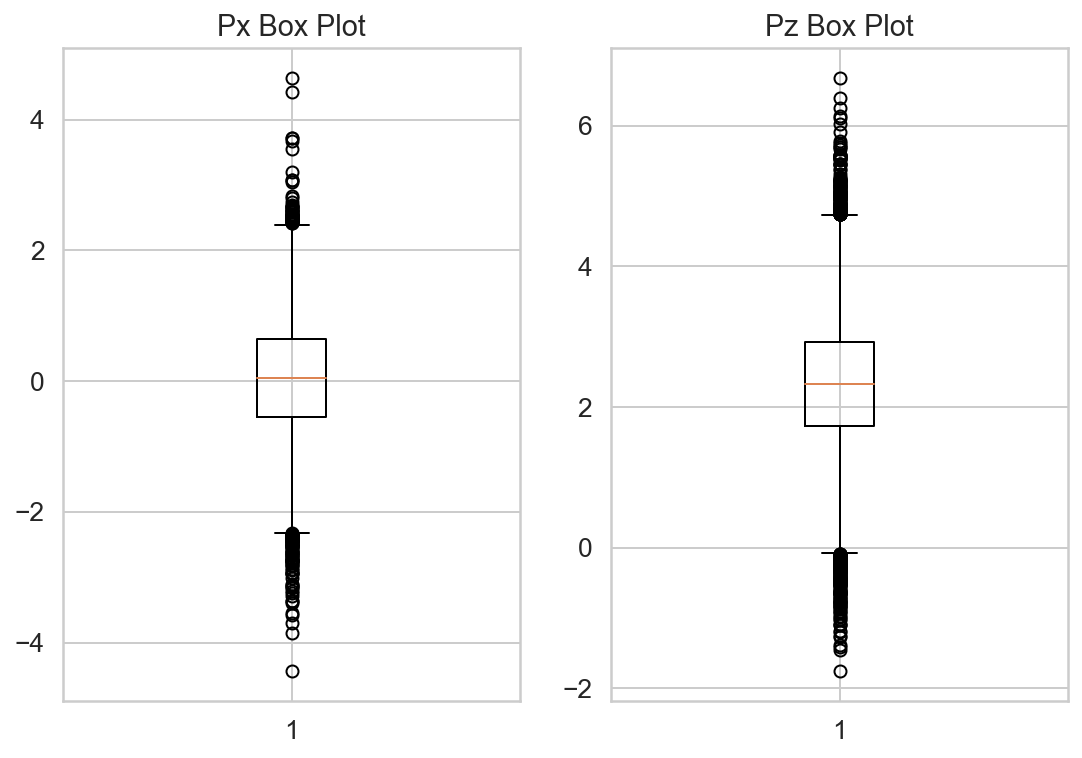

In [28]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.boxplot(output_df.px)
plt.title('Px Box Plot')
plt.subplot(1,2,2)
plt.boxplot(output_df.pz)
plt.title('Pz Box Plot')

Looking at the box plot, there are a good amount of outliers.  Looking at these, for px these are pitches that would be about 1.5 feet off the strikezone (edge of strikezone at ~+/- 0.71, since the plate is 17" wide).  Thus, these are pitches that should be obvious not to swing at.  

For pz, the lower whisker is below 0, meaning the pitch is hitting the ground before homeplate.  The upper whisker is at ~4.5, which would be ~1 foot over the top of the zone on the average strikezone.  AGain, these should be obvious pitches to not swing at.

### Histograms

Here I'll check out a histogram to see if they are somewhat normally distributed, although the box plots seem to somewhat suggest this.

Text(0.5, 1.0, 'Pz Histogram')

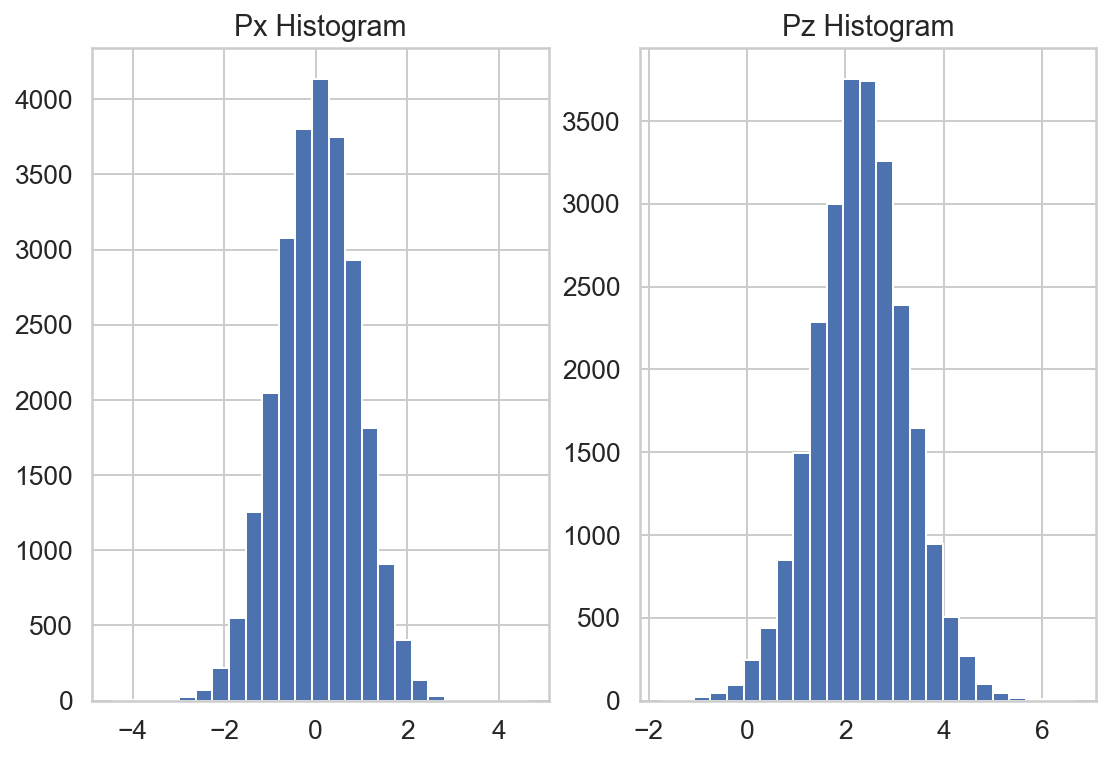

In [29]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(output_df.px, bins=25)
plt.title('Px Histogram')
plt.subplot(1,2,2)
plt.hist(output_df.pz, bins=25)
plt.title('Pz Histogram')

They do seem to be relatively normally distributed, outward from the middle of the strikezone (Px = 0, Pz = ~2).

# Removing outliers

For this, I'll be trying to retrain a model with outliers beyond the whiskers removed from px and pz.

In [30]:
#Defining interquartile range for Px and pz:
px_iqr = right_rates.px.quantile(0.75) - right_rates.px.quantile(0.25)
pz_iqr = right_rates.pz.quantile(0.75) - right_rates.pz.quantile(0.25)

#Whiskers are at 1.5 above and below the 25th/75th percentile:
px_lower = right_rates.px.quantile(0.25) - 1.5*px_iqr
px_upper = right_rates.px.quantile(0.75) + 1.5*px_iqr

pz_lower = right_rates.pz.quantile(0.25) - 1.5*pz_iqr
pz_upper = right_rates.pz.quantile(0.75) + 1.5*pz_iqr
print(px_lower, px_upper)
print(pz_lower, pz_upper)

-2.384767786437216 2.4024229311831817
-0.16456648820112219 4.671610813668537


Filtering the right_rates dataframe for these values.  How many rows are beyond for each?

In [31]:
right_rates.shape[0] - right_rates[(right_rates.px > px_lower) & (right_rates.px < px_upper)].shape[0]

15815

In [32]:
right_rates.shape[0] - right_rates[(right_rates.pz > pz_lower) & (right_rates.pz < pz_upper)].shape[0]

40102

In [33]:
right_rates.shape[0]

2847555

About 16k and 40k, respectively, out of 2.8 million.  I'll remove these and re-run the pipeline, to see if there is any effect.

In [34]:
outliers_removed = right_rates[((right_rates.px > px_lower) & (right_rates.px < px_upper)) & ((right_rates.pz > pz_lower) & (right_rates.pz < pz_upper))]

Training new model on top 50 pitchers:

In [37]:
pitcher_list_2 = right_rates.pitcher_full_name.value_counts().head(50).index
pitcher_list_2

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran', 'Jake Arrieta', 'Zack Greinke',
       'Cole Hamels', 'Trevor Bauer', 'Gerrit Cole', 'Jacob deGrom',
       'Dallas Keuchel', 'Jake Odorizzi', 'James Shields', 'Kyle Gibson',
       'Marco Estrada', 'J.A. Happ', 'Kevin Gausman', 'Tanner Roark',
       'Mike Fiers', 'Ian Kennedy', 'Mike Leake', 'Kyle Hendricks',
       'David Price', 'Carlos Martinez', 'Carlos Carrasco', 'Andrew Cashner',
       'Jeff Samardzija', 'Madison Bumgarner', 'Jason Hammel',
       'Masahiro Tanaka', 'CC Sabathia', 'Robbie Ray', 'Wade Miley',
       'Clayton Kershaw', 'Danny Duffy', 'Bartolo Colon', 'Patrick Corbin',
       'Sonny Gray', 'Chase Anderson', 'Johnny Cueto', 'Francisco Liriano',
       'Hector Santiago', 'Jordan Zimmermann', 'Felix Hernandez'],
      dtype='object')

In [36]:
output_df = multiple_pitcher_predictions(pitcher_list_2, outliers_removed, split_size = 0.2, class_method = 'XGBoost')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2457937776106777
Accuracy: 0.5097514340344168
Precision: (0.4119222114631674,)
Recall: 0.24062379940243214
Random Forest Pitch Classification confusion matrix results:
[[1176  143   43    8   12    1]
 [ 382  116    5    2    0    0]
 [ 308   23   27    4    3    0]
 [ 193    8    8    3    1    0]
 [ 107    3   11    3    7    0]
 [   9    5    0    0    0    4]]
Val Px R^2: 0.056608379665961106
Val Px MAE: 0.6688628588066994 ft.
Val Pz R^2: 0.1312279821634934
Val Pz MAE: 0.6183451045208658 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.24915958077911807


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.625
Precision: (0.285774621370068,)
Recall: 0.19701629044395333
Random Forest Pitch Classification confusion matrix results:
[[1479   45   39    4    0    0]
 [ 366   75   18    2    0    0]
 [ 324   27   18    0    0    0]
 [ 104    3    2    3    0    0]
 [   8    0    0    0    0    0]
 [   3    0    0    0    0    0]]
Val Px R^2: 0.09193030678516712
Val Px MAE: 0.5985868370973738 ft.
Val Pz R^2: 0.1726846857734179
Val Pz MAE: 0.6464120967317327 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.25790754257907544
Accuracy: 0.5782232704402516
Precision: (0.4725889301399315,)
Recall: 0.3429158681001133
Random Forest Pitch Classification confusion matrix results:
[[809 364  13  10   1]
 [416 635  11  10   0]
 [142  64  14   3   0]
 [ 10  18   1  12   0]
 [  5   4   0   1   1]]
Val Px R^2: 0.18154612588305763
Val Px MAE: 0.5558214229381825 ft.
Val Pz R^2: 0.09709755634946082
Val Pz MAE: 0.7436898371252265 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.24901664145234492
Accuracy: 0.4892669096800324
Precision: (0.34111470632623114,)
Recall: 0.314841116220398
Random Forest Pitch Classification confusion matrix results:
[[929 144  46   1  31]
 [433 148  47   6  31]
 [127  31  99   1   0]
 [141  30  20   0   5]
 [140  26   0   1  32]]
Val Px R^2: -0.03130053500630492
Val Px MAE: 0.6510386582235398 ft.
Val Pz R^2: 0.013921641205214552
Val Pz MAE: 0.6971274351677971 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24589511394168573
Accuracy: 0.46944556859571024
Precision: (0.44263104270790476,)
Recall: 0.4550575455701629
Random Forest Pitch Classification confusion matrix results:
[[600  83 114  37]
 [254 192  61 177]
 [265  76 128  73]
 [ 15 123  33 240]]
Val Px R^2: 0.0165250547139022
Val Px MAE: 0.6720246506465751 ft.
Val Pz R^2: 0.0034867249416004054
Val Pz MAE: 0.6452329671506267 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'SI': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24761324395693682
Accuracy: 0.42616899097621
Precision: (0.36238536861137083,)
Recall: 0.33120430687083924
Random Forest Pitch Classification confusion matrix results:
[[552 168  54  28  21]
 [201 332  53  28  22]
 [150  90  92  13  15]
 [152 118  35  29   9]
 [ 94  85  41  22  34]]
Val Px R^2: 0.02438958294985183
Val Px MAE: 0.6167005559010503 ft.
Val Pz R^2: 0.06671561262240944
Val Pz MAE: 0.7065332130800367 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.24186093247588425
Accuracy: 0.4624013294557541
Precision: (0.32628128796053385,)
Recall: 0.24274784342177208
Random Forest Pitch Classification confusion matrix results:
[[948 139  24  17   4]
 [410 126  19  17   5]
 [241  40  19   4   3]
 [181  31   3  15   3]
 [114  30   7   2   5]]
Val Px R^2: 0.07502151299544357
Val Px MAE: 0.7009591285624479 ft.
Val Pz R^2: 0.1943076321931071
Val Pz MAE: 0.5666403962217288 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.24817813765182187
Accuracy: 0.36500815660685154
Precision: (0.3206260369308594,)
Recall: 0.2948489498466505
Random Forest Pitch Classification confusion matrix results:
[[455 114  62  86  71   6]
 [200 155  36  50  64   7]
 [168  69  68  62  24   2]
 [139  25  40  98   0   3]
 [128  61   6   0 115   1]
 [ 63  21  12  14  23   4]]
Val Px R^2: 0.10559452993948237
Val Px MAE: 0.6483759240877686 ft.
Val Pz R^2: 0.03938553790879007
Val Pz MAE: 0.6759567523892045 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.24457917994039666
Accuracy: 0.4046218487394958
Precision: (0.3767782623479642,)
Recall: 0.357937374993471
Random Forest Pitch Classification confusion matrix results:
[[518 129  82  49]
 [261 292  53  55]
 [260  93  88  41]
 [224 129  41  65]]
Val Px R^2: 0.05379893174032213
Val Px MAE: 0.6608667074419916 ft.
Val Pz R^2: 0.1957953781293651
Val Pz MAE: 0.6559113453262181 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'PO': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24285564744059457
Accuracy: 0.44525862068965516
Precision: (0.34523909663498087,)
Recall: 0.284212367447584
Random Forest Pitch Classification confusion matrix results:
[[773 121  68  12  15]
 [361 109  45   4   5]
 [211  42 127  12  14]
 [131  16  35  17   6]
 [140  19  21   9   7]]
Val Px R^2: 0.14125518351851762
Val Px MAE: 0.6584260363808667 ft.
Val Pz R^2: 0.09650726011836286
Val Pz MAE: 0.6319371906677912 ft.




Pitch Modeling for Jake Arrieta
Here is the coding for last pitch type:
{'SI': 0, 'SL': 1, 'FF': 2, 'CU': 3, 'CH': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'SL': 1, 'CU': 2, 'FF': 3, 'CH': 4}
Actual Test Size: 0.2452431289640592
Accuracy: 0.503448275862069
Precision: (0.4015003463567668,)
Recall: 0.2866270725040306
Random Forest Pitch Classification confusion matrix results:
[[963 114  20  42   4]
 [328 109  19  37   0]
 [195  46  26  15   2]
 [148  46   5  66   1]
 [103  22   2   3   4]]
Val Px R^2: 0.08395232543551556
Val Px MAE: 0.6383911590438613 ft.
Val Pz R^2: 0.03824487773727481
Val Pz MAE: 0.6844714843879277 ft.




Pitch Modeling for Zack Greinke
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FT': 4, 'EP': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FT': 4}
Actual Test Size: 0.25753541378208544
Accuracy: 0.43961952026468154
Precision: (0.3771961057659346,)
Recall: 0.2920892618347886
Random Forest Pitch Classification confusion matrix results:
[[755 134  83  19   6]
 [278 171  18   6   8]
 [295  41 112  10   7]
 [168  36  35  10   2]
 [149  38  18   4  15]]
Val Px R^2: 0.13763615015206765
Val Px MAE: 0.6411892871836897 ft.
Val Pz R^2: 0.0843542373438162
Val Pz MAE: 0.6471409647596725 ft.




Pitch Modeling for Cole Hamels
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'FC': 3, 'CU': 4, 'SL': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'FC': 3, 'CU': 4, 'SL': 5}
Actual Test Size: 0.25623995715050885
Accuracy: 0.3733277591973244
Precision: (0.36029855620607604,)
Recall: 0.29084190665828874
Random Forest Pitch Classification confusion matrix results:
[[443 111  94  35  29   1]
 [164 182  82  28  25   1]
 [169  86 158  49  17   1]
 [150  61  90  66  16   1]
 [120  61  51  33  41   0]
 [  9   4   4   7   0   3]]
Val Px R^2: -0.0016434693385900534
Val Px MAE: 0.7026047523552665 ft.
Val Pz R^2: 0.07246098623223007
Val Pz MAE: 0.6635295866852788 ft.




Pitch Modeling for Trevor Bauer
Here is the coding for last pitch type:
{'FF': 0, 'KC': 1, 'FC': 2, 'FT': 3, 'CH': 4, 'CU': 5, 'SL': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'KC': 2, 'FC': 3, 'CH': 4, 'CU': 5, 'SL': 6}
Actual Test Size: 0.25561674008810575
Accuracy: 0.4274019819043516
Precision: (0.3998099572667622,)
Recall: 0.35738991214455534
Random Forest Pitch Classification confusion matrix results:
[[543  72 102  41  24  24   4]
 [121 103  31  21   9  30  10]
 [120  14 164   8   6   0  10]
 [147  41  51  29  10  21   2]
 [126  32  32  19  23  14   2]
 [ 63  32   0  15  12  89   0]
 [ 33   4  20   3   2   1  41]]
Val Px R^2: 0.07967194371230146
Val Px MAE: 0.5782387079866979 ft.
Val Pz R^2: 0.12261688809432825
Val Pz MAE: 0.7504842099887794 ft.




Pitch Modeling for Gerrit Cole
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'KC': 2, 'SI': 3, 'CH': 4, 'FT': 5, 'CU': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'KC': 2, 'SI': 3, 'CH': 4, 'FT': 5, 'CU': 6}
Actual Test Size: 0.251761899598829


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.512489233419466
Precision: (0.268896737663569,)
Recall: 0.20367932998294314
Random Forest Pitch Classification confusion matrix results:
[[1075   52   24   27    4   10    0]
 [ 368   55    9   15    1    8    0]
 [ 224   19    9   15    1    6    0]
 [  83   13    3   39    0    0    0]
 [ 104    5    1    9    1    3    0]
 [ 116    9    1    0    1   11    0]
 [   1    0    0    0    0    0    0]]
Val Px R^2: 0.04547652665483903
Val Px MAE: 0.63641261175291 ft.
Val Pz R^2: 0.02816034248963961
Val Pz MAE: 0.6854904943658945 ft.




Pitch Modeling for Jacob deGrom
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.25792397342337436
Accuracy: 0.4391891891891892
Precision: (0.3716269149954833,)
Recall: 0.2728342257108637
Random Forest Pitch Classification confusion matrix results:
[[844  85  46  20   8]
 [343  78  42  12   5]
 [247  28  79   7   5]
 [203  33  24  28   4]
 [161  20  27   8  11]]
Val Px R^2: 0.14726204756029349
Val Px MAE: 0.5978351139085626 ft.
Val Pz R^2: 0.14932711613510297
Val Pz MAE: 0.6504492961373032 ft.




Pitch Modeling for Dallas Keuchel
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'FC': 2, 'CH': 3, 'FF': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FC': 3, 'FF': 4}
Actual Test Size: 0.2510112605225757
Accuracy: 0.502177700348432
Precision: (0.39386594213192083,)
Recall: 0.2895143948464093
Random Forest Pitch Classification confusion matrix results:
[[967  95  23  23  15]
 [319  97  14  14   8]
 [184  31  31  12  11]
 [152  27  11  29   8]
 [152  17  12  15  29]]
Val Px R^2: 0.022554999238965312
Val Px MAE: 0.6952952465440573 ft.
Val Pz R^2: 0.06007540776668652
Val Pz MAE: 0.6469080831935216 ft.




Pitch Modeling for Jake Odorizzi
Here is the coding for last pitch type:
{'FF': 0, 'FS': 1, 'SL': 2, 'FT': 3, 'FC': 4, 'CU': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FS': 1, 'FT': 2, 'SL': 3, 'FC': 4, 'CU': 5}
Actual Test Size: 0.2508779631255487
Accuracy: 0.4636920384951881
Precision: (0.3645857844359464,)
Recall: 0.31524695097728517
Random Forest Pitch Classification confusion matrix results:
[[714 119  70  34  35   4]
 [278  93  85  14   7   1]
 [ 70  44 168   3   6   0]
 [147   8  24  39  13   1]
 [122   8  28  12  45   0]
 [ 58  16   9   6   4   1]]
Val Px R^2: 0.17976211369978046
Val Px MAE: 0.5818057189084804 ft.
Val Pz R^2: 0.07218612757276843
Val Pz MAE: 0.7348801762131295 ft.




Pitch Modeling for James Shields
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'KC': 2, 'FT': 3, 'CH': 4, 'EP': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CH': 2, 'KC': 3, 'FT': 4}
Actual Test Size: 0.24977954144620812
Accuracy: 0.40114739629302737
Precision: (0.38261935656550883,)
Recall: 0.3772567803026939
Random Forest Pitch Classification confusion matrix results:
[[359 108  73  66  37]
 [137 158  74  72  21]
 [ 58  69 166  64  49]
 [ 82  87  76 156  36]
 [ 85  60  60  43  70]]
Val Px R^2: 0.11575941710710791
Val Px MAE: 0.695718369751187 ft.
Val Pz R^2: 0.09180384289939736
Val Pz MAE: 0.6184805883866367 ft.




Pitch Modeling for Kyle Gibson
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CH': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.2442907334211682
Accuracy: 0.41258426966292133
Precision: (0.36331967846985014,)
Recall: 0.3032215534093694
Random Forest Pitch Classification confusion matrix results:
[[583 121  54  33   5]
 [244 185  44  35   7]
 [223  49 104  19   7]
 [176  66  28  36   3]
 [101  58  19  15  10]]
Val Px R^2: 0.06009253246920254
Val Px MAE: 0.6964146610379448 ft.
Val Pz R^2: 0.16503923227937267
Val Pz MAE: 0.6372979903467523 ft.




Pitch Modeling for Marco Estrada
Here is the coding for last pitch type:
{'FF': 0, 'CH': 1, 'FC': 2, 'CU': 3, 'PO': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CH': 1, 'FC': 2, 'CU': 3}
Actual Test Size: 0.23696682464454977
Accuracy: 0.48372093023255813
Precision: (0.39030503761351926,)
Recall: 0.3031699273052817
Random Forest Pitch Classification confusion matrix results:
[[820 176  17   3]
 [514 191  15   3]
 [134  44  27   0]
 [154  38  12   2]]
Val Px R^2: 0.16540793182691882
Val Px MAE: 0.5353982796953423 ft.
Val Pz R^2: 0.03986653160605991
Val Pz MAE: 0.7537799265375698 ft.




Pitch Modeling for J.A. Happ
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'CH': 3, 'CU': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.25151108126259236
Accuracy: 0.5536270582999555
Precision: (0.3747610507193439,)
Recall: 0.25308185592312843
Random Forest Pitch Classification confusion matrix results:
[[1133   60   18   11    5]
 [ 286   80    5    9    3]
 [ 237   24   19    7    1]
 [ 176   27    2    8    4]
 [ 120    7    0    1    4]]
Val Px R^2: 0.0741733432643864
Val Px MAE: 0.6268905618482187 ft.
Val Pz R^2: 0.1981970077444346
Val Pz MAE: 0.6244602134696076 ft.




Pitch Modeling for Kevin Gausman
Here is the coding for last pitch type:
{'FF': 0, 'FS': 1, 'SL': 2, 'FT': 3, 'PO': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FS': 1, 'SL': 2, 'FT': 3}
Actual Test Size: 0.2519075403949731
Accuracy: 0.620044543429844
Precision: (0.39106521692161433,)
Recall: 0.2694820086957267
Random Forest Pitch Classification confusion matrix results:
[[1351   43   17    0]
 [ 480   31    3    2]
 [ 264    9    9    1]
 [  33    1    0    1]]
Val Px R^2: 0.0844821045382047
Val Px MAE: 0.6236318190843593 ft.
Val Pz R^2: 0.1561239576414959
Val Pz MAE: 0.6270418681011761 ft.




Pitch Modeling for Tanner Roark
Here is the coding for last pitch type:
{'SI': 0, 'FT': 1, 'SL': 2, 'CU': 3, 'FF': 4, 'CH': 5, 'FC': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'FT': 1, 'SL': 2, 'CU': 3, 'FF': 4, 'CH': 5, 'FC': 6}
Actual Test Size: 0.24703758040853177
Accuracy: 0.4476930105070809
Precision: (0.2823284186795846,)
Recall: 0.30224226791928216
Random Forest Pitch Classification confusion matrix results:
[[507   0  11   8   0   4   0]
 [  4 322  54  27  62  13   1]
 [131  96  50  10  25   5   0]
 [107 114  13  19  28   9   0]
 [ 34 147  31  18  74   8   0]
 [ 76  97  12  12  45   8   0]
 [  0   3   0   4   0   0   0]]
Val Px R^2: 0.09284200398092601
Val Px MAE: 0.6525667551352523 ft.
Val Pz R^2: 0.043729732648007724
Val Pz MAE: 0.6725525708746404 ft.




Pitch Modeling for Mike Fiers
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'CH': 2, 'SL': 3, 'FT': 4, 'FC': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CH': 1, 'CU': 2, 'SL': 3, 'FT': 4, 'FC': 5}
Actual Test Size: 0.2488328664799253
Accuracy: 0.4638836772983114
Precision: (0.3316471017157368,)
Recall: 0.2757543553378405
Random Forest Pitch Classification confusion matrix results:
[[795  52  39  14  28  21]
 [271  57  27   9  27   1]
 [235  25  50   7  18   3]
 [ 89  11   7  22   8   0]
 [ 50  31  25  12  63   0]
 [115  11   5   1   1   2]]
Val Px R^2: 0.03890004313947293
Val Px MAE: 0.6106232754491332 ft.
Val Pz R^2: 0.02691475359789619
Val Pz MAE: 0.7454780978150337 ft.




Pitch Modeling for Ian Kennedy
Here is the coding for last pitch type:
{'FF': 0, 'KC': 1, 'SL': 2, 'CH': 3, 'FT': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'KC': 1, 'CH': 2, 'FT': 3, 'SL': 4}
Actual Test Size: 0.24054271587903875
Accuracy: 0.5368068833652008
Precision: (0.3681172951747887,)
Recall: 0.31105508712032176
Random Forest Pitch Classification confusion matrix results:
[[961  34   7  43  16]
 [238  19   4  35   7]
 [212   5   4  33   8]
 [104   6   1 122  14]
 [171   5   0  26  17]]
Val Px R^2: 0.11529338616359719
Val Px MAE: 0.6140903884516539 ft.
Val Pz R^2: 0.08878992887548132
Val Pz MAE: 0.6640742386828771 ft.




Pitch Modeling for Mike Leake
Here is the coding for last pitch type:
{'SI': 0, 'FC': 1, 'KC': 2, 'CH': 3, 'SL': 4, 'FF': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'FC': 1, 'CH': 2, 'SL': 3, 'KC': 4, 'FF': 5}
Actual Test Size: 0.25230520977408943
Accuracy: 0.45363179534033804
Precision: (0.27707929879250287,)
Recall: 0.21721422040818184
Random Forest Pitch Classification confusion matrix results:
[[863  69  28  23   9   3]
 [299  70  27   9  10   1]
 [174  34  26  10   9   1]
 [150  28   7  25   1   1]
 [157  28  15   6   8   3]
 [ 72  10   5   5   2   1]]
Val Px R^2: 0.07231308810836778
Val Px MAE: 0.6761838893303025 ft.
Val Pz R^2: 0.025503034355610854
Val Pz MAE: 0.5628385820767925 ft.




Pitch Modeling for Kyle Hendricks
Here is the coding for last pitch type:
{'SI': 0, 'CH': 1, 'FF': 2, 'CU': 3, 'FC': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CH': 1, 'FF': 2, 'CU': 3, 'FC': 4}
Actual Test Size: 0.25280963967095355
Accuracy: 0.5554537121906508
Precision: (0.4109858051678751,)
Recall: 0.34095647395198814
Random Forest Pitch Classification confusion matrix results:
[[874 118  36  10  17]
 [284 224  35   5  16]
 [100  77  92   7   2]
 [ 75  24  19   6   2]
 [108  23   6   6  16]]
Val Px R^2: 0.15951326945862865
Val Px MAE: 0.6331670483482503 ft.
Val Pz R^2: 0.024877679669809027
Val Pz MAE: 0.6466742246450597 ft.




Pitch Modeling for David Price
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CH': 2, 'FC': 3, 'KC': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'CH': 1, 'FC': 2, 'FF': 3, 'KC': 4}
Actual Test Size: 0.23567678612188997
Accuracy: 0.4043583535108959
Precision: (0.35279967339794716,)
Recall: 0.33140054187579904
Random Forest Pitch Classification confusion matrix results:
[[425 104  57  85   3]
 [173 135  62  76   8]
 [183  67 100  49  13]
 [106  72  35 168   4]
 [ 61  28  19  25   7]]
Val Px R^2: 0.02004150312798536
Val Px MAE: 0.660407392463245 ft.
Val Pz R^2: 0.021913567478848095
Val Pz MAE: 0.6266514205162366 ft.




Pitch Modeling for Carlos Martinez
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CH': 2, 'CU': 3, 'SL': 4, 'FC': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'CH': 2, 'CU': 3, 'SL': 4, 'FC': 5}
Actual Test Size: 0.25189063408958695
Accuracy: 0.4212471131639723
Precision: (0.3781740627269734,)
Recall: 0.3791043209950271
Random Forest Pitch Classification confusion matrix results:
[[383 113  47  56  39  13]
 [140 235  49  54  91   7]
 [105  94  58  40  36  12]
 [ 87  53  28 112   1   2]
 [ 71  50  18   0 108   8]
 [ 17   9   5   0   8  16]]
Val Px R^2: 0.017242348199912882
Val Px MAE: 0.6845051895737383 ft.
Val Pz R^2: -0.0029765459824746543
Val Pz MAE: 0.655909662196979 ft.




Pitch Modeling for Carlos Carrasco
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5, 'AB': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.24554088487375492
Accuracy: 0.4070754716981132
Precision: (0.35437450632801537,)
Recall: 0.31155043339868815
Random Forest Pitch Classification confusion matrix results:
[[577  89  79  38  23]
 [171 107  31  31  16]
 [187  55  91  26  14]
 [152  33  55  56  12]
 [148  51  32  14  32]]
Val Px R^2: 0.0692073758227496
Val Px MAE: 0.688243869785367 ft.
Val Pz R^2: 0.0648907974639229
Val Pz MAE: 0.6091118323309439 ft.




Pitch Modeling for Andrew Cashner
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'CH': 3, 'CU': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.2474616292798111
Accuracy: 0.4952290076335878
Precision: (0.4243985332219439,)
Recall: 0.34283400905146955
Random Forest Pitch Classification confusion matrix results:
[[482 194  37  12   3]
 [149 450  43   8   9]
 [118 170  78   6   2]
 [ 75 101  18  20   7]
 [ 68  28   6   4   8]]
Val Px R^2: 0.05730036846674458
Val Px MAE: 0.6560967817003142 ft.
Val Pz R^2: 0.08284643715132767
Val Pz MAE: 0.6713893335390774 ft.




Pitch Modeling for Jeff Samardzija
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'FC': 3, 'FS': 4, 'KC': 5, 'CU': 6, 'CH': 7, 'PO': 8}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'FC': 3, 'FS': 4, 'KC': 5, 'CU': 6, 'CH': 7}
Actual Test Size: 0.24790218173099976


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3583172147001934
Precision: (0.25146959158629956,)
Recall: 0.21066122653772856
Random Forest Pitch Classification confusion matrix results:
[[384  88  95  31  11  11  11   0]
 [140 186  77  17   7   8  11   0]
 [173  99  98  16   6   6   5   0]
 [ 86  56  36  53   1   1   0   0]
 [ 91  41  23   2   6   1   4   0]
 [ 17  50  22   1   3   7   0   0]
 [ 62   5   3   4   3   0   7   0]
 [  1   0   2   0   0   0   0   0]]
Val Px R^2: 0.05151457865116971
Val Px MAE: 0.6791387829633265 ft.
Val Pz R^2: 0.07148784244151218
Val Pz MAE: 0.6257230149848498 ft.




Pitch Modeling for Madison Bumgarner
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'FC': 4, 'CH': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.25685846079145425
Accuracy: 0.41493383742911155
Precision: (0.3529011052504168,)
Recall: 0.3432020822732961
Random Forest Pitch Classification confusion matrix results:
[[411 144   6  27  27   1]
 [218 160   9  14   0   2]
 [ 80  49 122  30  95   3]
 [168  48  51  50  53   1]
 [ 11   0  94  15 134   0]
 [ 29  12  32   6  13   1]]
Val Px R^2: 0.03374793018008293
Val Px MAE: 0.6603965560314381 ft.
Val Pz R^2: 0.1537664288228211
Val Pz MAE: 0.6739379283680547 ft.




Pitch Modeling for Jason Hammel
Here is the coding for last pitch type:
{'SL': 0, 'FF': 1, 'FT': 2, 'CU': 3, 'CH': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SL': 0, 'FF': 1, 'FT': 2, 'CU': 3, 'CH': 4}
Actual Test Size: 0.24849600982197667


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.43033596837944665
Precision: (0.27072149470441303,)
Recall: 0.2886510858704297
Random Forest Pitch Classification confusion matrix results:
[[435 165 105   7   0]
 [236 234  72   9   0]
 [201  93 201   5   0]
 [ 83  56  38   1   0]
 [ 40  26  16   1   0]]
Val Px R^2: 0.08561139605394741
Val Px MAE: 0.6114306001729489 ft.
Val Pz R^2: 0.02485863836457658
Val Pz MAE: 0.7330095055511204 ft.




Pitch Modeling for Masahiro Tanaka
Here is the coding for last pitch type:
{'SL': 0, 'FS': 1, 'FF': 2, 'SI': 3, 'CU': 4, 'FC': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SL': 0, 'FS': 1, 'SI': 2, 'FF': 3, 'FC': 4, 'CU': 5}
Actual Test Size: 0.24416495344056113
Accuracy: 0.3808816245666171
Precision: (0.307750675913105,)
Recall: 0.27301284963464284
Random Forest Pitch Classification confusion matrix results:
[[288 176  35  53  11  12]
 [145 326  48  36   8   4]
 [101 111  81  14   0   8]
 [ 94 103  15  60   4   6]
 [ 52  60  12  21  12   1]
 [ 41  39  17  18   5   2]]
Val Px R^2: 0.15641339438699386
Val Px MAE: 0.5782039357959327 ft.
Val Pz R^2: 0.07757495319976326
Val Pz MAE: 0.6603284512912141 ft.




Pitch Modeling for CC Sabathia
Here is the coding for last pitch type:
{'SI': 0, 'SL': 1, 'FC': 2, 'FF': 3, 'CH': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'SL': 1, 'FC': 2, 'FF': 3, 'CH': 4}
Actual Test Size: 0.25182215743440234
Accuracy: 0.43270622286541244
Precision: (0.4164297957950199,)
Recall: 0.4094763922752379
Random Forest Pitch Classification confusion matrix results:
[[320  97  66  87  17]
 [188 187 124  57  15]
 [ 28  78 222   0  11]
 [148  44   5 143   9]
 [ 65  47  62  28  25]]
Val Px R^2: 0.0010739285785560382
Val Px MAE: 0.6887638662595799 ft.
Val Pz R^2: 0.04805085627963901
Val Pz MAE: 0.6785005171569173 ft.




Pitch Modeling for Robbie Ray
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4}
Actual Test Size: 0.25488257107540174
Accuracy: 0.532007759456838
Precision: (0.3798194088641734,)
Recall: 0.3031248897040876
Random Forest Pitch Classification confusion matrix results:
[[891  85  52  31   2]
 [315  78  51   7   1]
 [139  24 109   2   6]
 [167  11   4  17   0]
 [ 43   3  22   0   2]]
Val Px R^2: 0.043266298848819496
Val Px MAE: 0.6717568940773637 ft.
Val Pz R^2: 0.08430953190439405
Val Pz MAE: 0.7085947526358778 ft.




Pitch Modeling for Wade Miley
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'CU': 3, 'SL': 4, 'FC': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'SL': 3, 'CU': 4, 'FC': 5}
Actual Test Size: 0.24762140121092302
Accuracy: 0.37624750499001997
Precision: (0.3521031869500177,)
Recall: 0.35063297699631013
Random Forest Pitch Classification confusion matrix results:
[[366  82  47  65  26  34]
 [138 123  35  30  17  25]
 [170  59  60  18  10  30]
 [133  48  21  78   7   4]
 [ 85  37  17  20  23  31]
 [ 17  20   6   1  17 104]]
Val Px R^2: 0.022862027656359363
Val Px MAE: 0.6700171073385798 ft.
Val Pz R^2: 0.06309286474585951
Val Pz MAE: 0.6528155322385745 ft.




Pitch Modeling for Clayton Kershaw
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'FT': 3, 'CH': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'FT': 3, 'CH': 4}
Actual Test Size: 0.23694978301301922


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5363683935112507
Precision: (0.39659087896861256,)
Recall: 0.2858544732032694
Random Forest Pitch Classification confusion matrix results:
[[722 181  35   1   0]
 [350 235  46   1   0]
 [161  77  66   0   0]
 [ 19   6   1   2   0]
 [  2   4   2   0   0]]
Val Px R^2: 0.052680360412323046
Val Px MAE: 0.5316725983339875 ft.
Val Pz R^2: 0.08984208773578228
Val Pz MAE: 0.7104686880876294 ft.




Pitch Modeling for Danny Duffy
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'CU': 3, 'SL': 4, 'EP': 5, 'FC': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'CU': 3, 'SL': 4, 'FC': 5}
Actual Test Size: 0.25015816778438565


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4274152756702074
Precision: (0.32439469023049977,)
Recall: 0.291550124939714
Random Forest Pitch Classification confusion matrix results:
[[522  66  35  57  47   0]
 [172 132  31  30  39   0]
 [163  62  55  26  41   0]
 [158  32  17  80   2   0]
 [105  29  17   1  56   0]
 [  2   0   0   0   0   0]]
Val Px R^2: 0.041823718364207174
Val Px MAE: 0.6166187703594038 ft.
Val Pz R^2: 0.08941649671240659
Val Pz MAE: 0.6724383204038626 ft.




Pitch Modeling for Bartolo Colon
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CH': 3, 'FC': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CH': 3, 'FC': 4}
Actual Test Size: 0.249342846413819
Accuracy: 0.5913654618473896
Precision: (0.25222353831270306,)
Recall: 0.23062064802123433
Random Forest Pitch Classification confusion matrix results:
[[1070   81    3    4    0]
 [ 371  107    1    0    0]
 [ 145   14    0    2    0]
 [ 167    6    0    1    1]
 [  19    0    0    0    0]]
Val Px R^2: 0.17969060936115866
Val Px MAE: 0.6347525620953157 ft.
Val Pz R^2: 0.0681993018454895
Val Pz MAE: 0.5591664007692337 ft.




Pitch Modeling for Patrick Corbin
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'FF': 2, 'CH': 3, 'CU': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SL': 0, 'FT': 1, 'FF': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.2522695307505434
Accuracy: 0.4546376077040041
Precision: (0.3877070971171467,)
Recall: 0.32366102554473686
Random Forest Pitch Classification confusion matrix results:
[[411 131 113   6   4]
 [199 310  77   5   8]
 [199 154 162   5   6]
 [ 31  64  27   8   0]
 [  7  38   2   0   6]]
Val Px R^2: 0.0643065605592823
Val Px MAE: 0.6435433558346237 ft.
Val Pz R^2: 0.11137147420078453
Val Pz MAE: 0.6518897607385958 ft.




Pitch Modeling for Sonny Gray
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'FC': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'FC': 5}
Actual Test Size: 0.24948559670781892
Accuracy: 0.44742268041237115
Precision: (0.4227584335365843,)
Recall: 0.311780782382294
Random Forest Pitch Classification confusion matrix results:
[[376 144  57  70   9   1]
 [143 293  26  37  11   0]
 [117  84  75  18   5   0]
 [ 95  80  17 113   1   0]
 [ 72  34  14   3  10   0]
 [ 17   4   0  13   0   1]]
Val Px R^2: 0.12184057381779045
Val Px MAE: 0.5612689567305326 ft.
Val Pz R^2: 0.06956941670908467
Val Pz MAE: 0.7152213096150111 ft.




Pitch Modeling for Chase Anderson
Here is the coding for last pitch type:
{'FF': 0, 'CH': 1, 'CU': 2, 'FT': 3, 'FC': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CH': 1, 'CU': 2, 'FT': 3, 'FC': 4}
Actual Test Size: 0.25365290951038194
Accuracy: 0.4249621020717534
Precision: (0.2993669997207472,)
Recall: 0.24893128234336714
Random Forest Pitch Classification confusion matrix results:
[[699  95  33  26   7]
 [292  81   8  22   4]
 [230  40  16  24   4]
 [171  45  13  41   4]
 [ 94  15   9   2   4]]
Val Px R^2: 0.08285652200403393
Val Px MAE: 0.6687820970111503 ft.
Val Pz R^2: 0.040748114656095846
Val Pz MAE: 0.6473035817235393 ft.




Pitch Modeling for Johnny Cueto
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'SL': 2, 'CH': 3, 'FC': 4, 'CU': 5, 'FA': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CH': 2, 'SL': 3, 'FC': 4, 'CU': 5}
Actual Test Size: 0.24676986056031724
Accuracy: 0.33540694660445824
Precision: (0.26998162089424355,)
Recall: 0.2608725276901691
Random Forest Pitch Classification confusion matrix results:
[[277  70  53  49  53   1]
 [136 149  60  44  33   0]
 [128  68  99  39  23   0]
 [133  75  51  62  22   0]
 [110  52  48  25  60   0]
 [  1   3   2   3   0   0]]
Val Px R^2: 0.010923073956893181
Val Px MAE: 0.7207457019267256 ft.
Val Pz R^2: 0.1171526885382762
Val Pz MAE: 0.6505312591350313 ft.




Pitch Modeling for Francisco Liriano
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'CU': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'CU': 4}
Actual Test Size: 0.2455455846013786


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4888771186440678
Precision: (0.3616567599067599,)
Recall: 0.27987754385239016
Random Forest Pitch Classification confusion matrix results:
[[581 187  51   4   0]
 [302 278  39   3   0]
 [199  80  56   3   0]
 [ 61  26   4   8   0]
 [  1   5   0   0   0]]
Val Px R^2: 0.06134033708620168
Val Px MAE: 0.691443191521188 ft.
Val Pz R^2: 0.01438723563452926
Val Pz MAE: 0.7057698682844229 ft.




Pitch Modeling for Hector Santiago
Here is the coding for last pitch type:
{'SI': 0, 'CH': 1, 'SL': 2, 'FC': 3, 'CU': 4, 'SC': 5, 'FF': 6, 'UN': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CH': 1, 'SL': 2, 'FC': 3, 'CU': 4, 'SC': 5, 'FF': 6}
Actual Test Size: 0.2514377424100575


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6138297872340426
Precision: (0.16612889315524626,)
Recall: 0.15249751825359276
Random Forest Pitch Classification confusion matrix results:
[[1118   32    2    4    1    0    2]
 [ 332   35    2    0    2    0    1]
 [ 109    4    1    0    0    0    0]
 [ 100    4    2    0    0    0    0]
 [  80    4    1    0    0    0    3]
 [  20    3    0    0    0    0    1]
 [  13    4    0    0    0    0    0]]
Val Px R^2: 0.0689646595215172
Val Px MAE: 0.6948210059252699 ft.
Val Pz R^2: 0.037762604506884956
Val Pz MAE: 0.6323558719892094 ft.




Pitch Modeling for Jordan Zimmermann
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'FT': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.252071638599305
Accuracy: 0.514846235418876
Precision: (0.3621830595047567,)
Recall: 0.2643567744295994
Random Forest Pitch Classification confusion matrix results:
[[787 122  27   6   5]
 [348 161   8   0   2]
 [235  30  14   3   5]
 [ 55   3   2   2   1]
 [ 40  21   2   0   7]]
Val Px R^2: 0.0829275447017056
Val Px MAE: 0.6303235216428099 ft.
Val Pz R^2: 0.12317021996562871
Val Pz MAE: 0.6124036833960392 ft.




Pitch Modeling for Felix Hernandez
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'CH': 2, 'FF': 3, 'SL': 4, 'PO': 5, 'FC': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CH': 1, 'CU': 2, 'FF': 3, 'SL': 4, 'FC': 5}
Actual Test Size: 0.23355131456025624


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.39371428571428574
Precision: (0.29701587084371844,)
Recall: 0.2587798025144706
Random Forest Pitch Classification confusion matrix results:
[[349  98  85  27   6   0]
 [157 153  70  26   7   0]
 [160  93 131  21   2   0]
 [ 97  63  58  51   1   0]
 [ 45  26  12   5   5   0]
 [  1   0   1   0   0   0]]
Val Px R^2: 0.024380297045691446
Val Px MAE: 0.6476514796264426 ft.
Val Pz R^2: 0.008086019403595879
Val Pz MAE: 0.6765541004469051 ft.






Seems to be performing at a slightly better level across the board, although it doesn't seem to be majorly different.

In [38]:
output_df.head()

inning batter_id pitcher_id  top         ab_id  p_score      event  \
2453     3.0    527038     453286  1.0  2.015001e+09      0.0  Strikeout   
2454     3.0    527038     453286  1.0  2.015001e+09      0.0  Strikeout   
2455     3.0    527038     453286  1.0  2.015001e+09      0.0  Strikeout   
2496     5.0    502517     453286  1.0  2.015001e+09      1.0     Flyout   
2497     5.0    502517     453286  1.0  2.015001e+09      1.0     Flyout   

     home_team away_team  b_score  ...  CH_prob  CU_prob  FC_prob  FT_prob  \
2453       was       nyn      0.0  ...     0.00     0.03     0.24      0.0   
2454       was       nyn      0.0  ...     0.01     0.03     0.21      0.0   
2455       was       nyn      0.0  ...     0.15     0.01     0.05      0.0   
2496       was       nyn      0.0  ...     0.18     0.27     0.00      0.0   
2497       was       nyn      0.0  ...     0.16     0.21     0.01      0.0   

       px_pred   pz_pred SI_prob  KC_prob FS_prob  SC_prob  
2453  0.015998  2.443350     NaN      NaN     NaN      NaN  
2454 -0.027437  2.342228     NaN      NaN     NaN      NaN  
2455  0.078370  2.199654     NaN      NaN     NaN      NaN  
2496 -0.282764  2.668434     NaN      NaN     NaN      NaN  
2497 -0.385352  2.594838     NaN      NaN     NaN      NaN  

[5 rows x 76 columns]

In [39]:
output_df.shape

(109173, 76)

## Plotting Location Error

Here I'll be plotting the actual vs. predicted pitch locations:

In [40]:
#Default Strikezone imagine layout:
def strikezone_layout():
    plt.xlim(-4, 4)
    plt.ylim(0,5)
    plt.hlines(y=1.57, xmin=-0.71, xmax=0.71)
    plt.hlines(y=3.42, xmin=-0.71, xmax=0.71)
    plt.vlines(x=-0.71, ymin=1.57, ymax=3.42)
    plt.vlines(x=0.71, ymin=1.57, ymax=3.42)
    plt.show();

In [41]:
pitch_type_list = output_df.pitch_type.value_counts().index

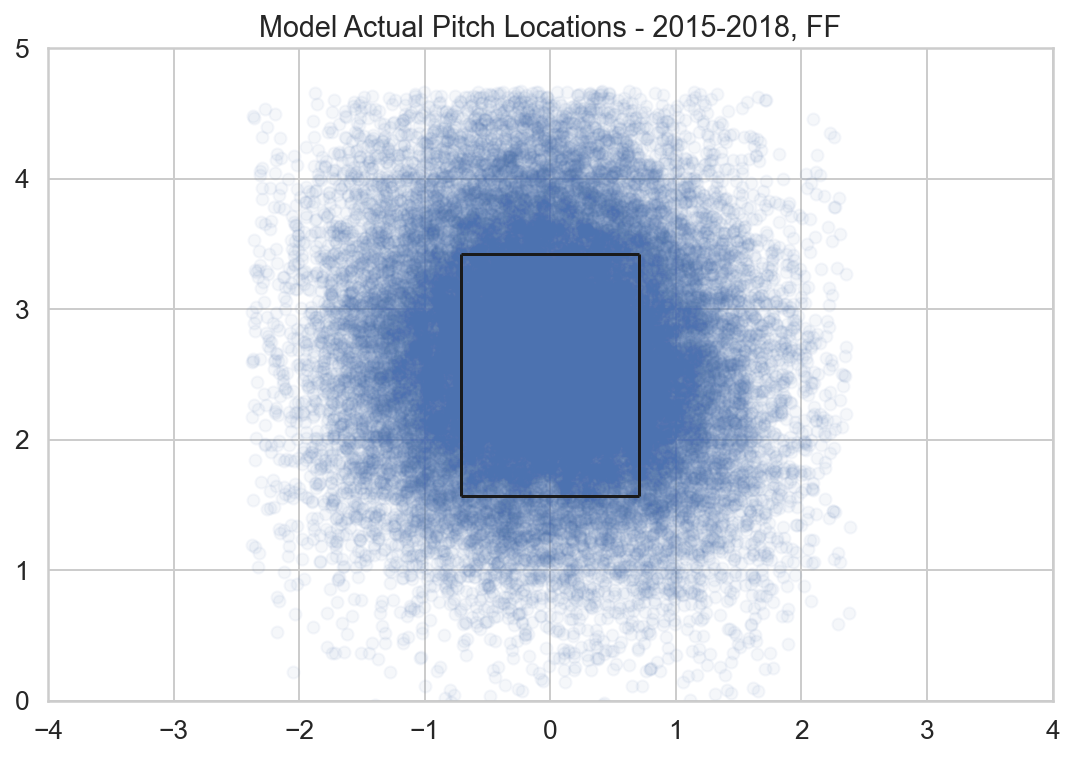

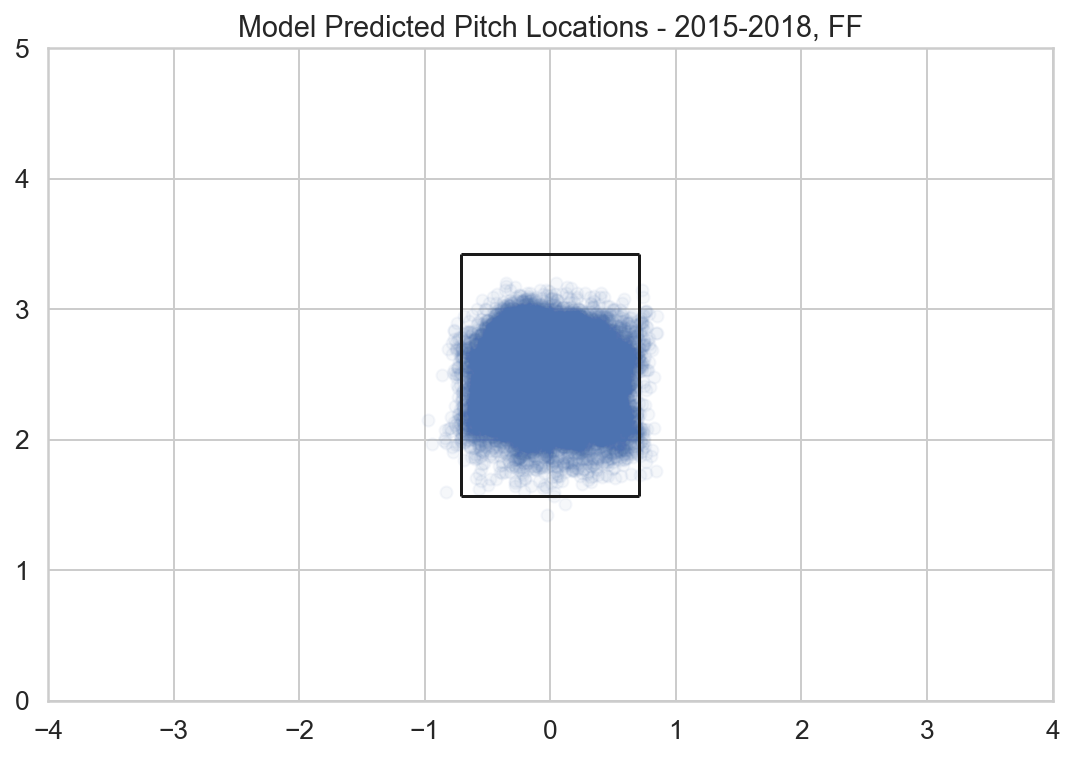

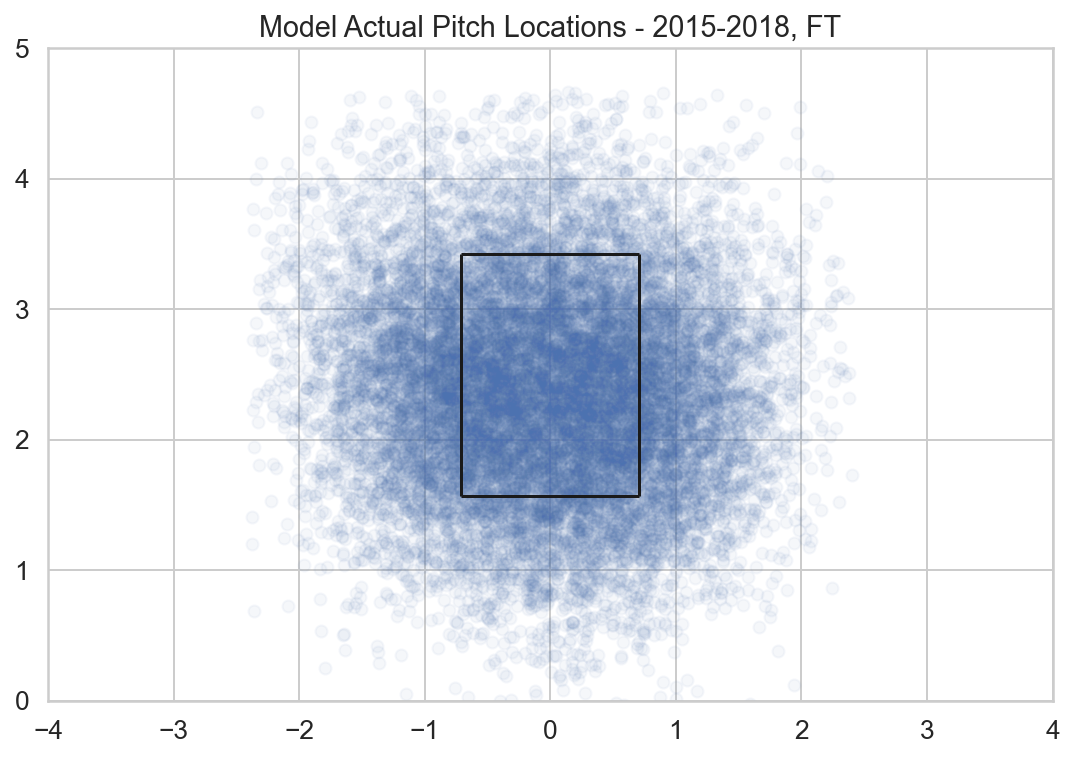

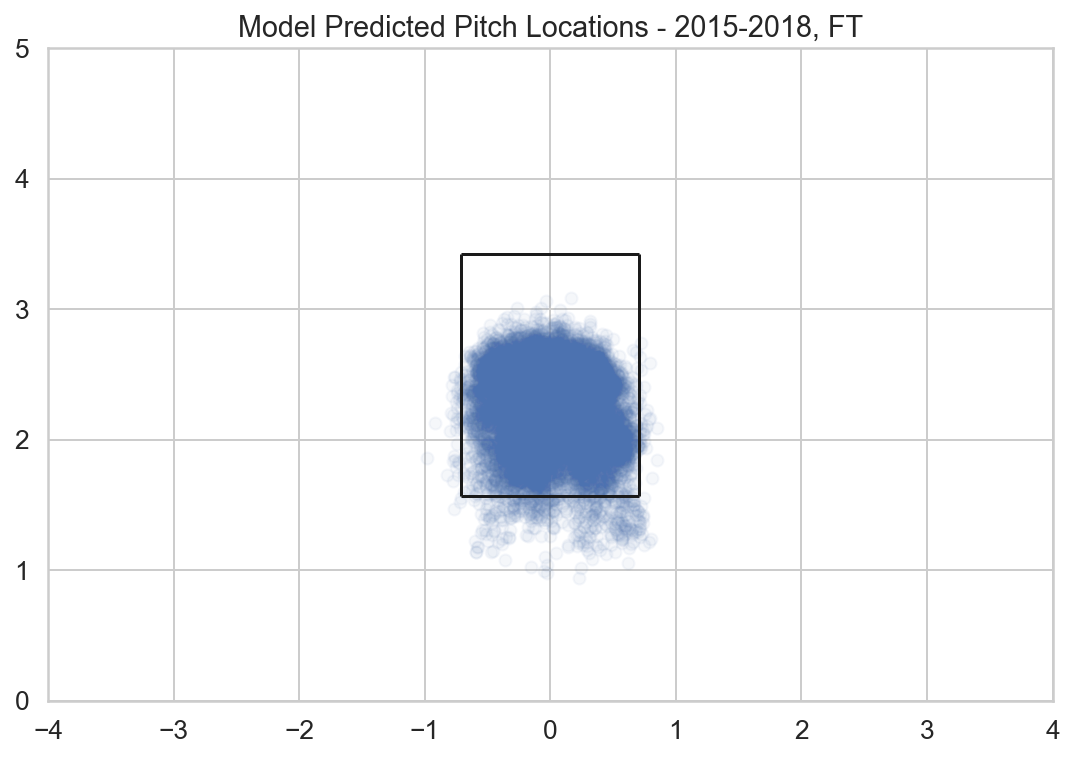

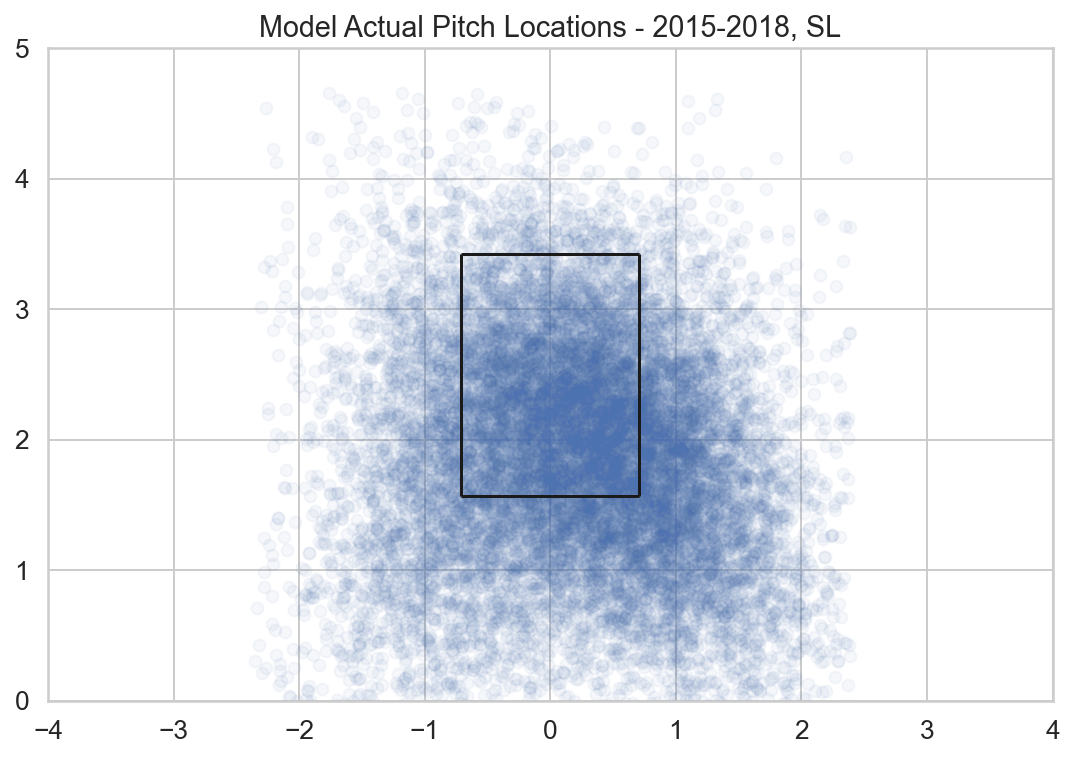

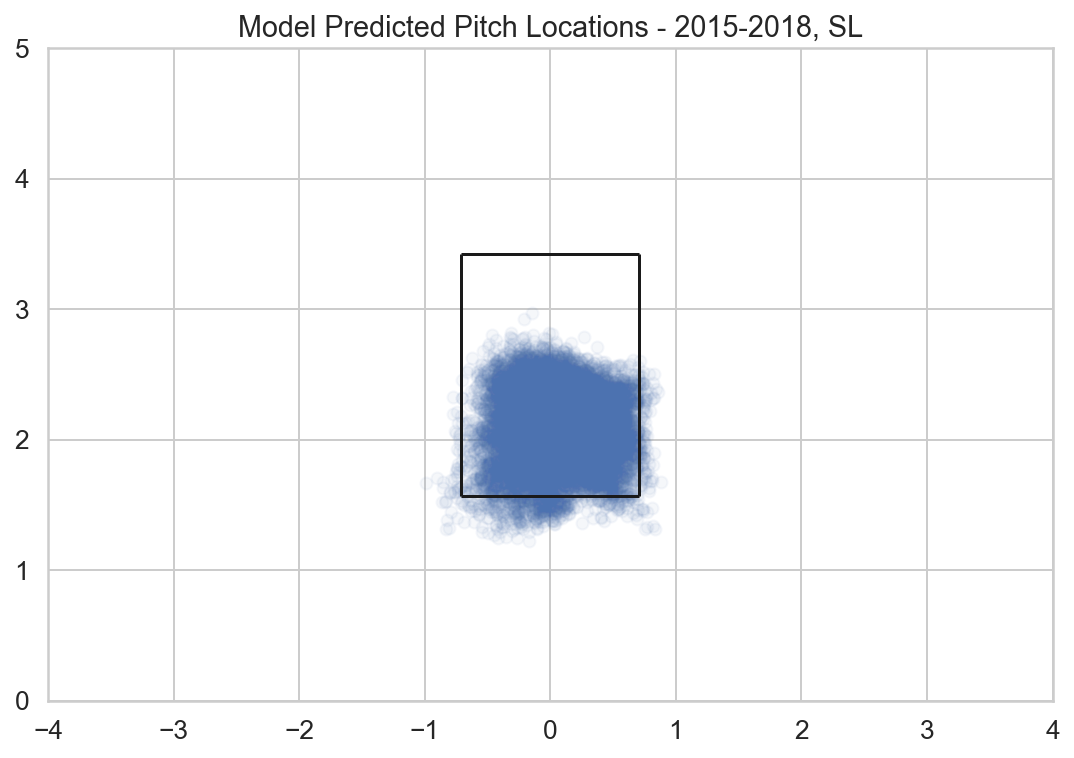

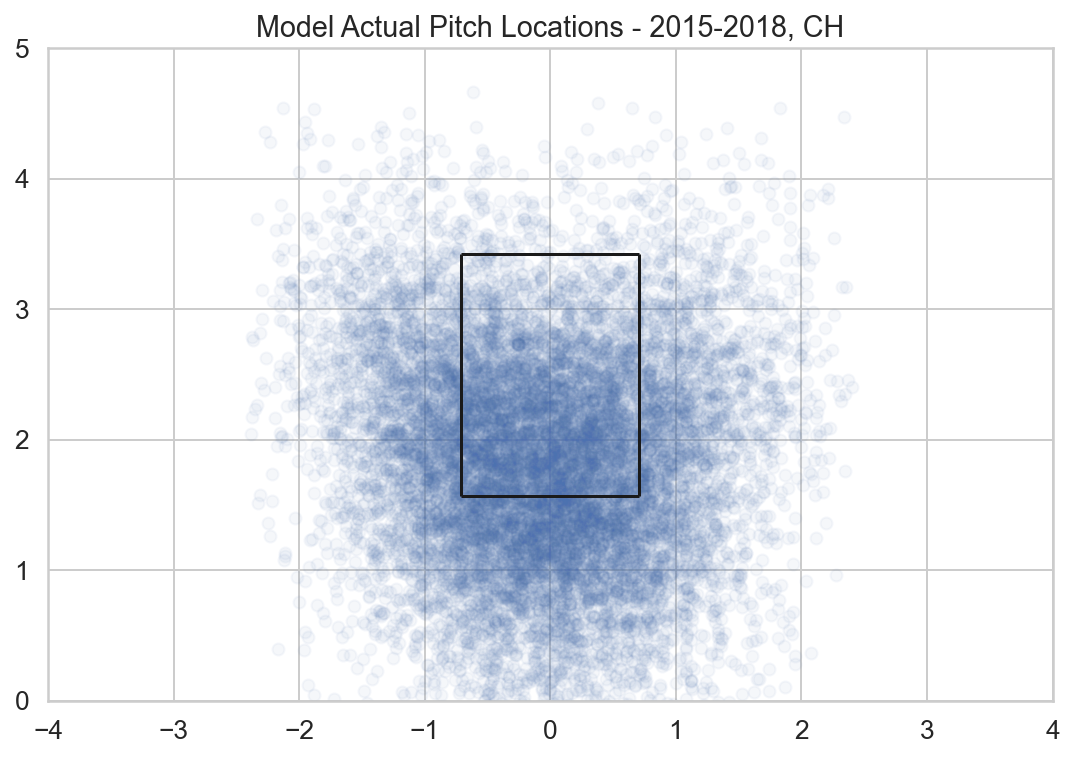

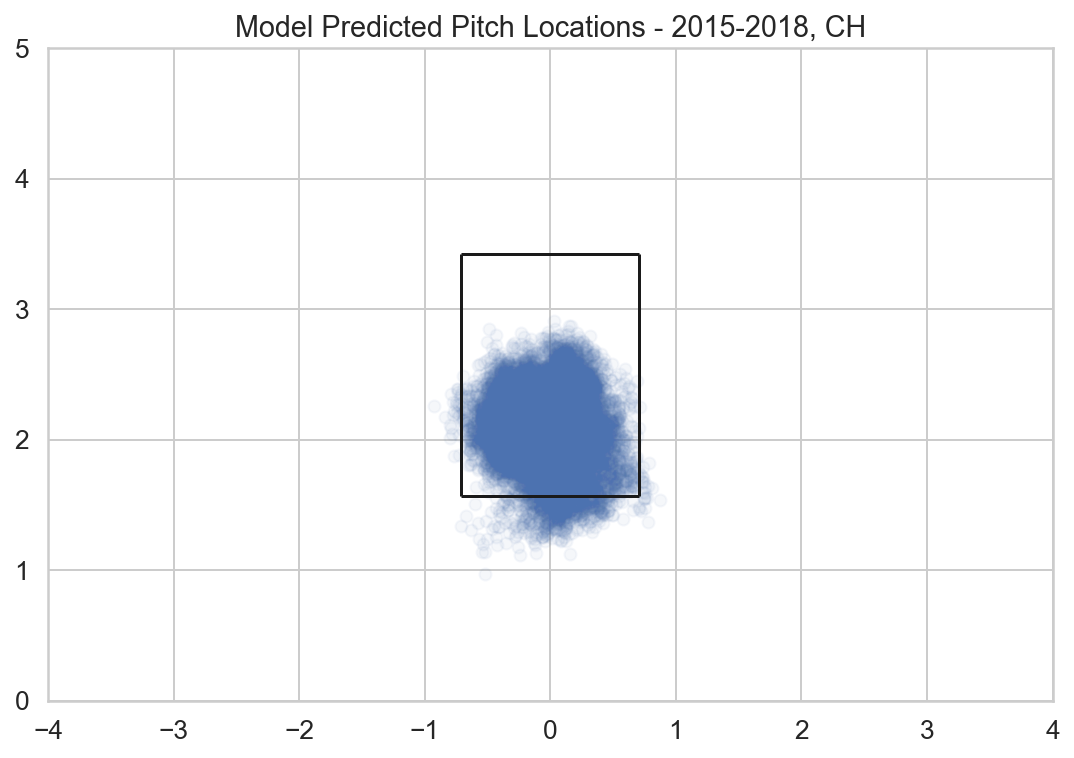

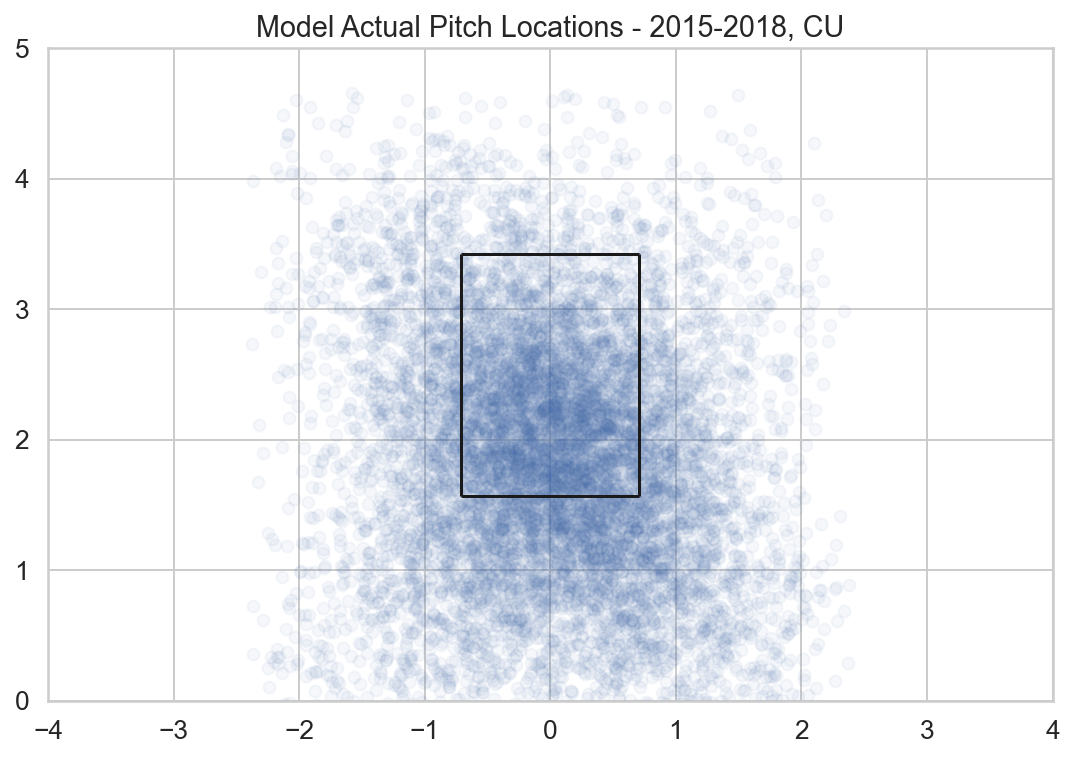

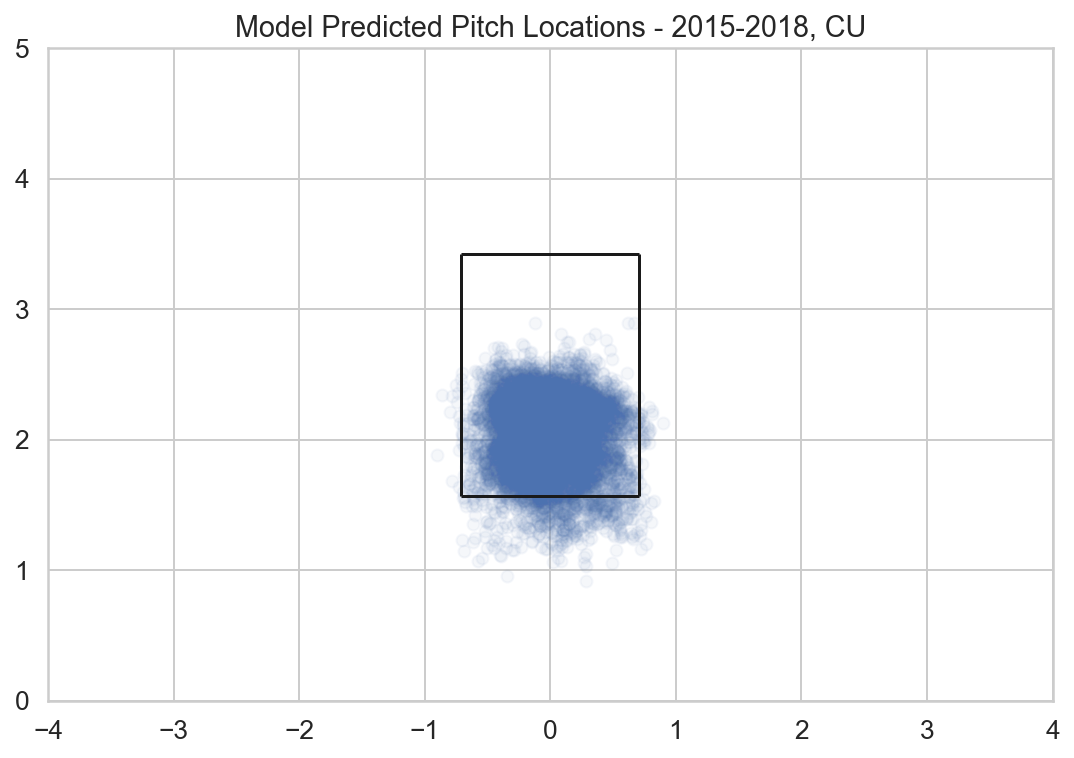

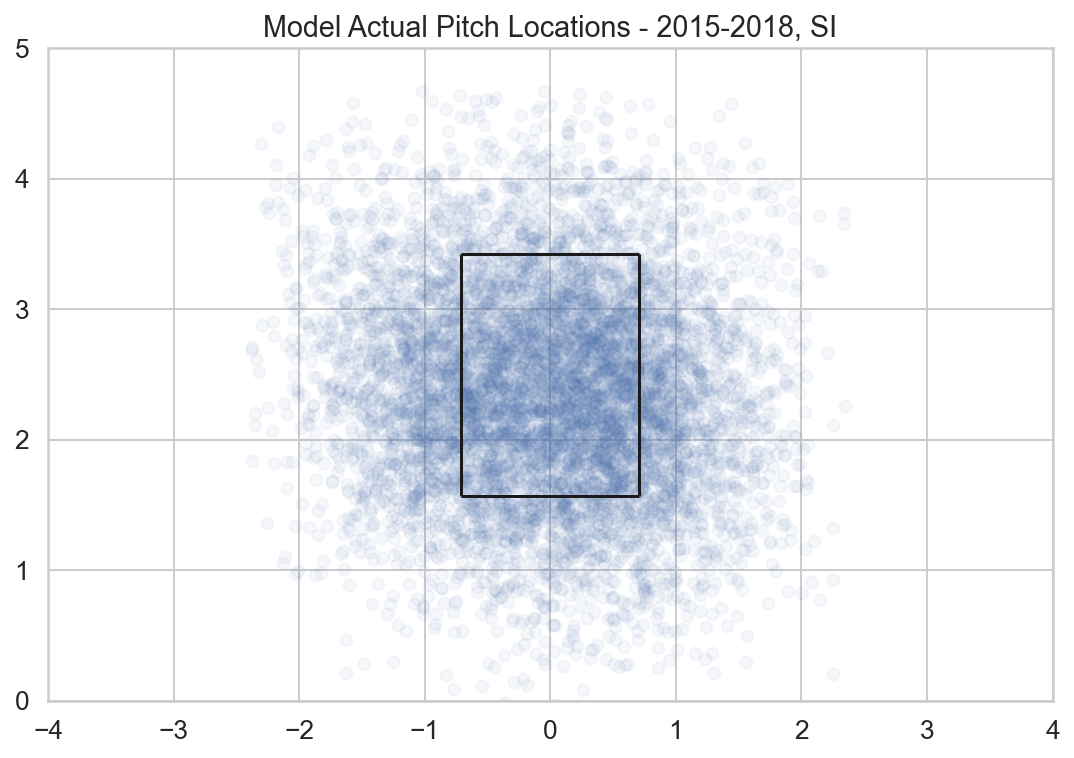

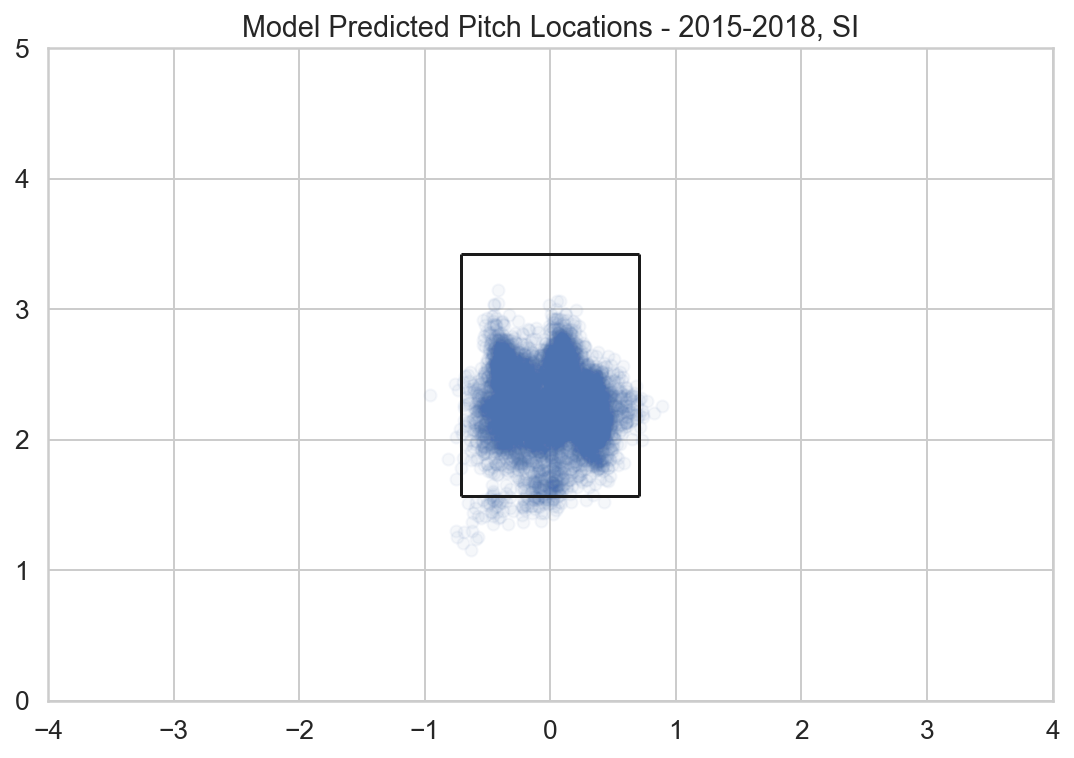

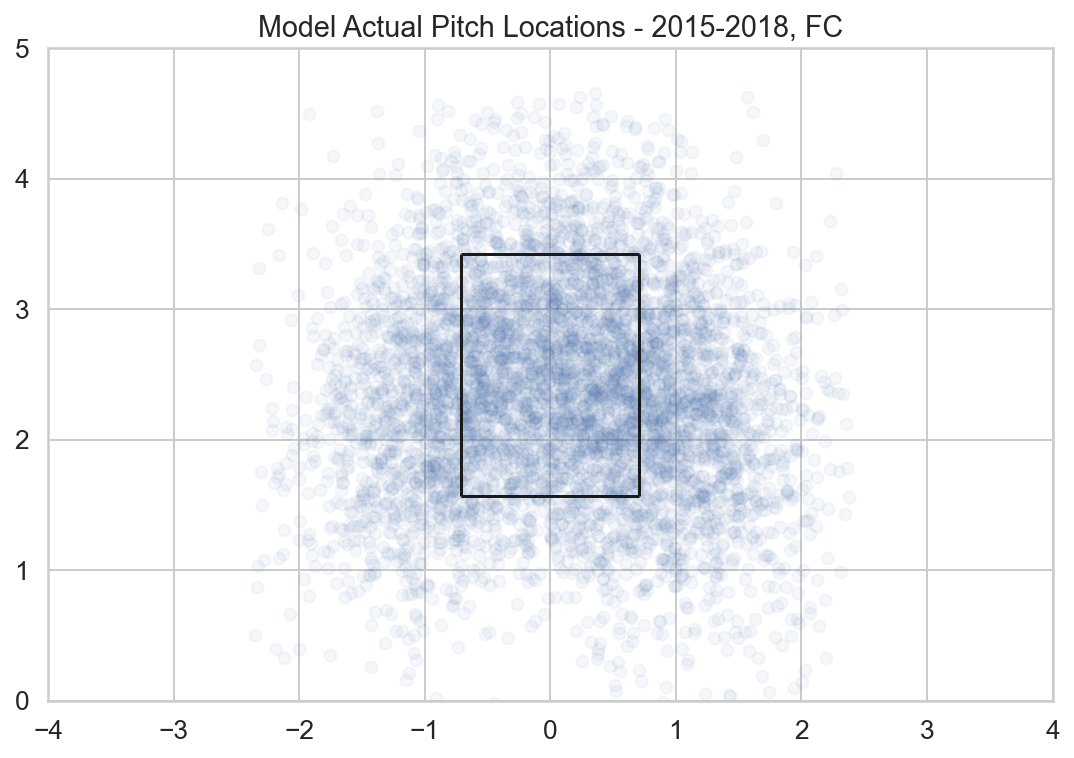

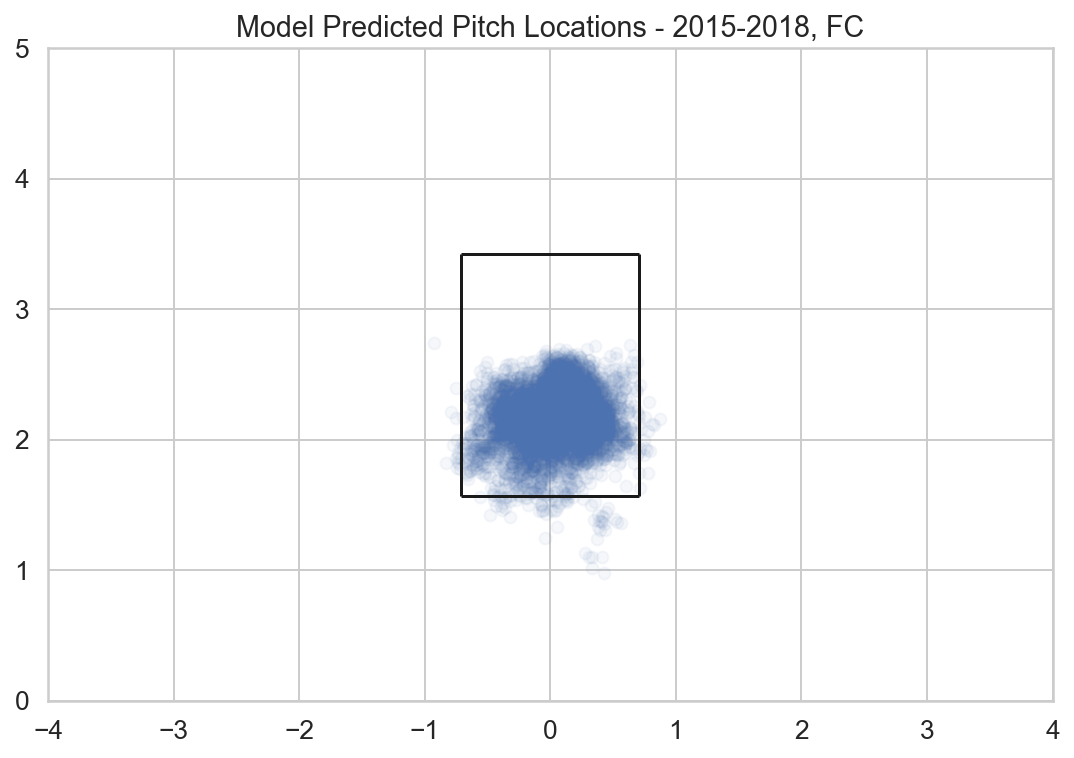

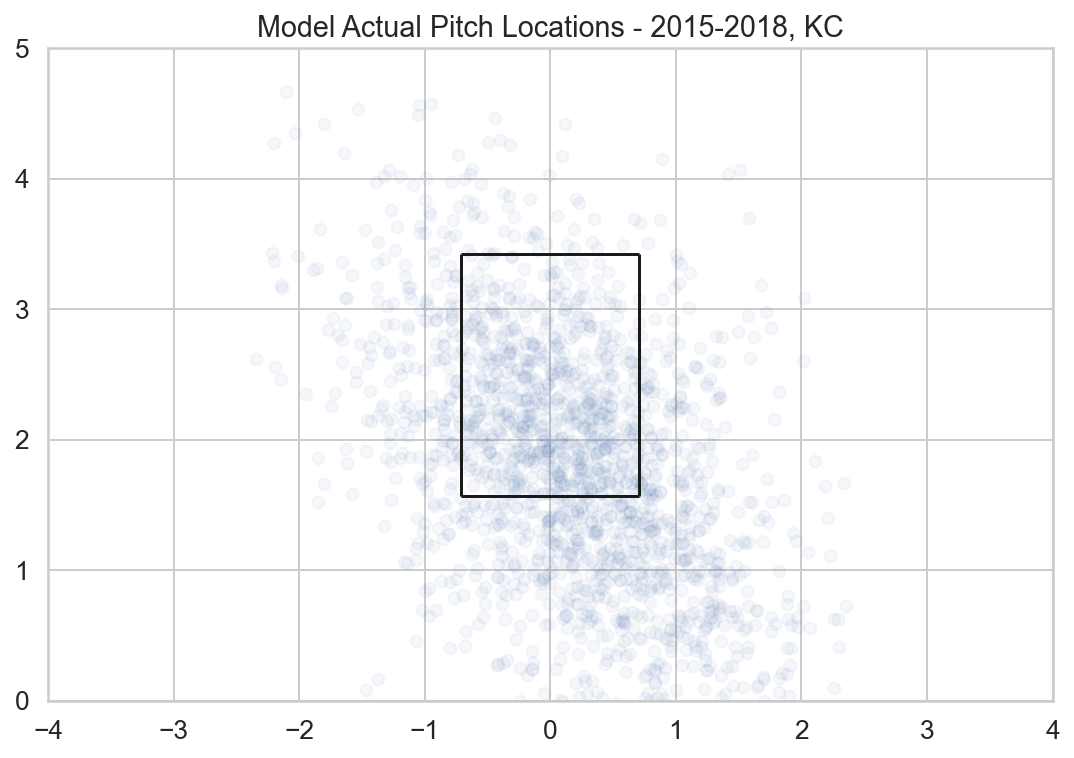

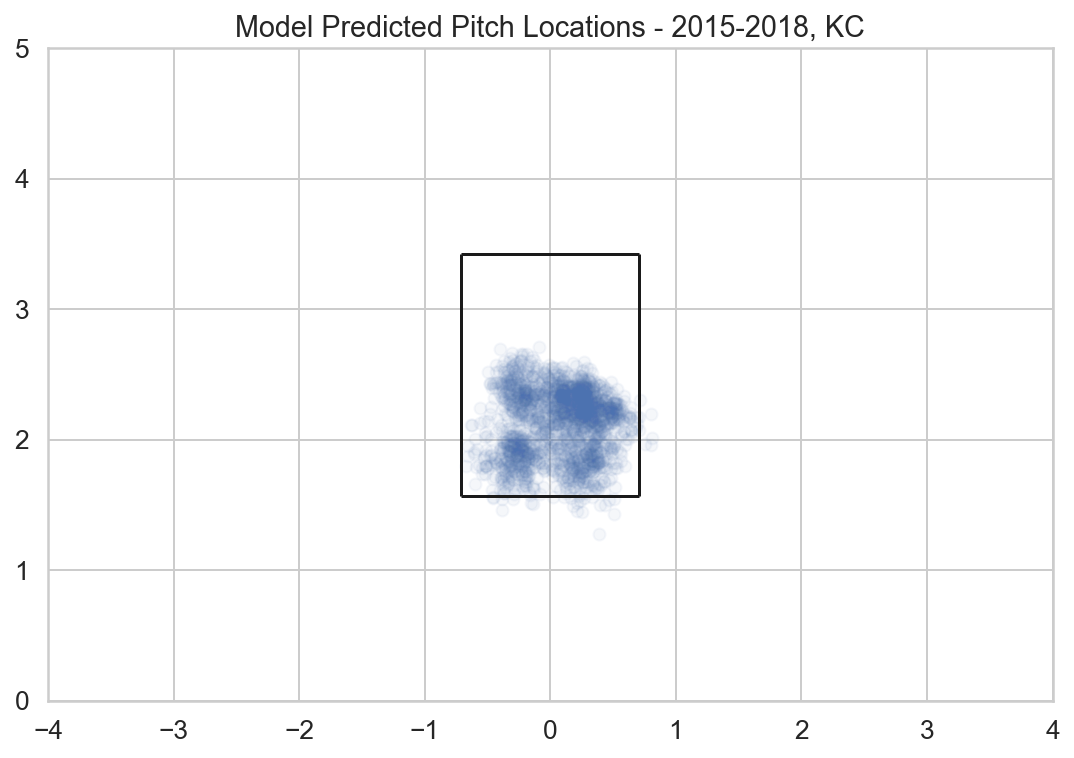

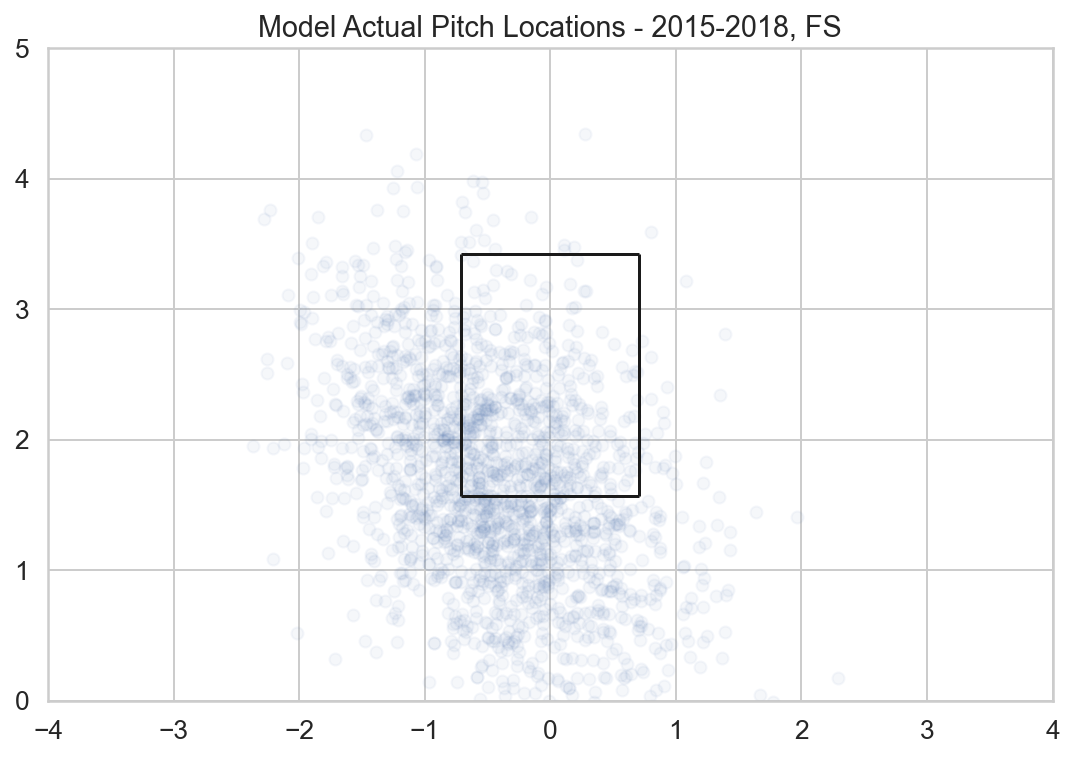

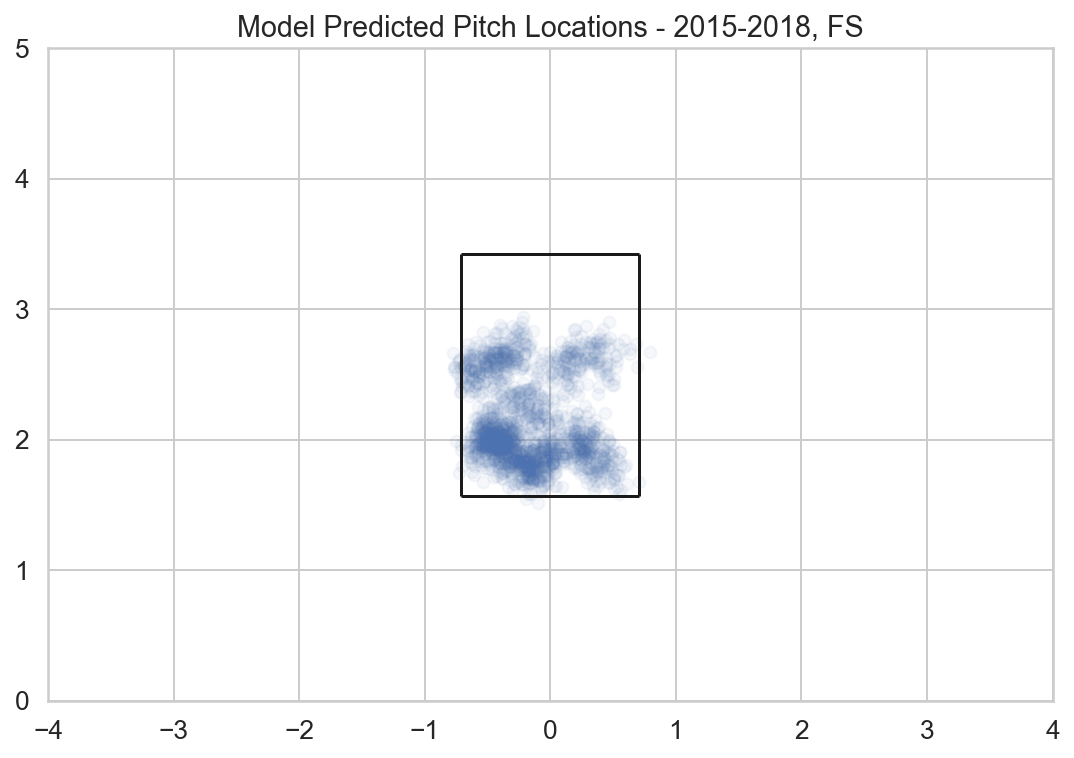

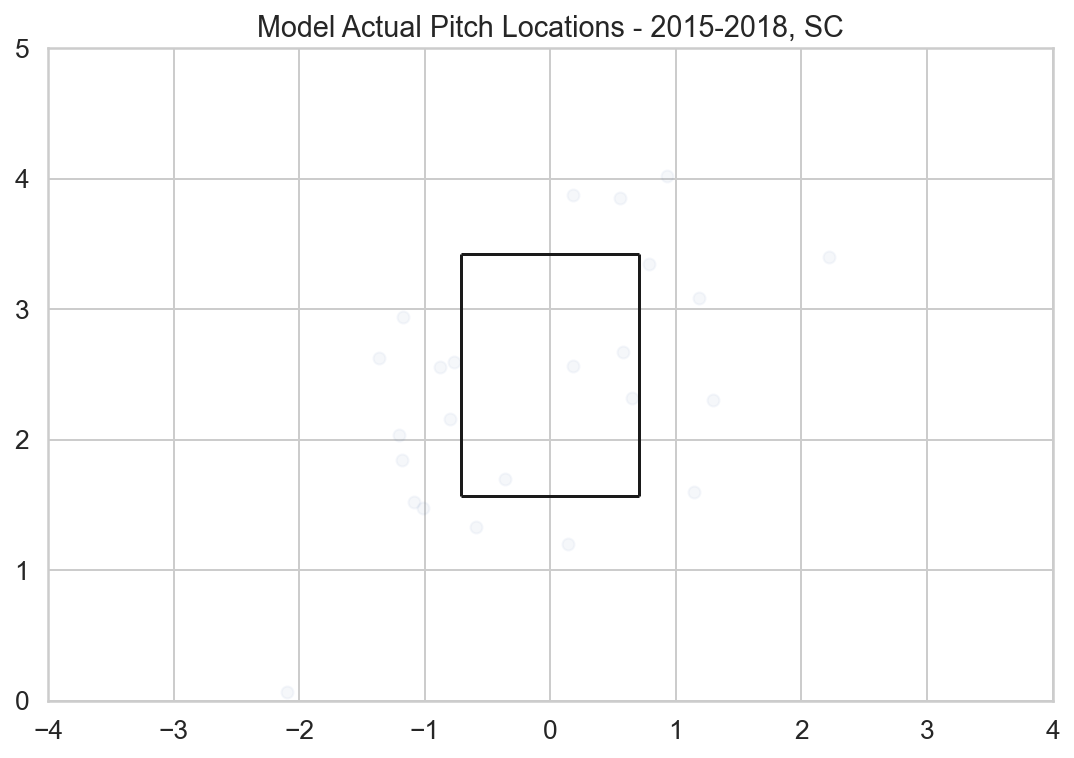

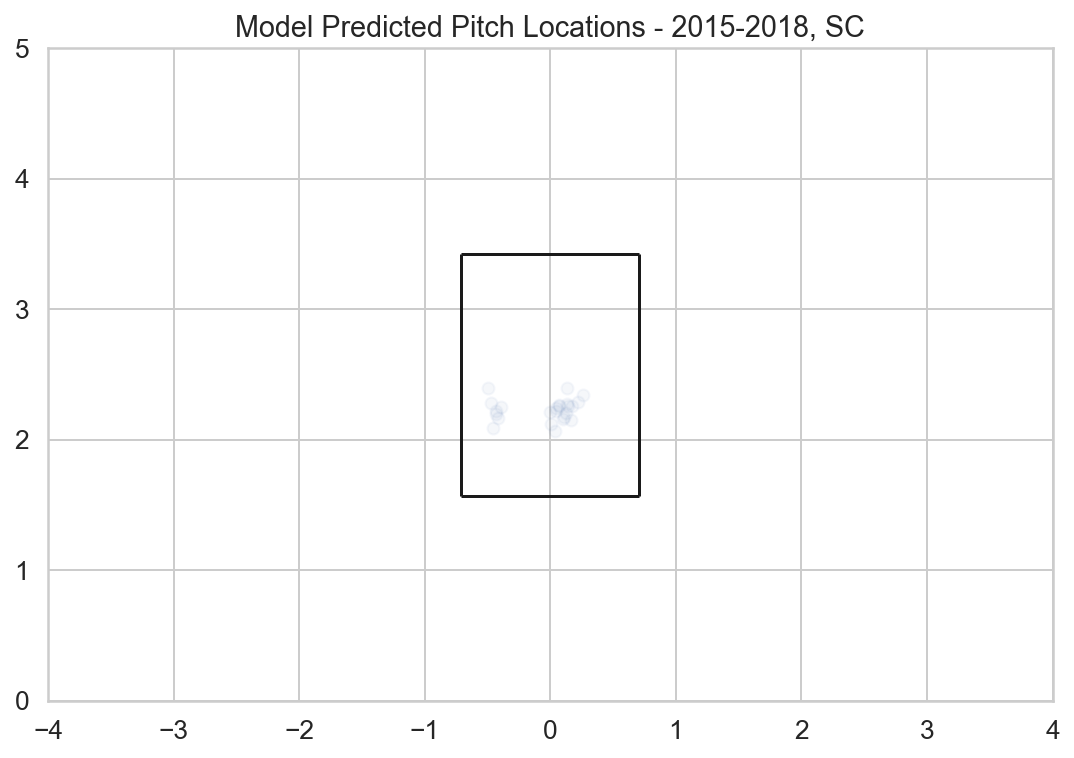

In [43]:
#plt.subplots(6, 2,figsize=(30,30))
for i, pitch_type in enumerate(pitch_type_list, 1):
    #plt.subplot(6,2,i)
    #Making even numbers actual pitches, odd predicted:
    plt.scatter(output_df['px'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], output_df['pz'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], alpha = 0.05)
    plt.title('Model Actual Pitch Locations - 2015-2018, {}'.format(pitch_type))
    strikezone_layout();

    plt.scatter(output_df['px_pred'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], output_df['pz_pred'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], alpha = 0.05)
    plt.title('Model Predicted Pitch Locations - 2015-2018, {}'.format(pitch_type))
    strikezone_layout();
        

## Most Accurate - Justin Verlander:

In [49]:
output_df[output_df.pitcher_full_name == 'Justin Verlander'].iloc[:, 33:46].tail(1)

cumulative_ff_rate  cumulative_sl_rate  cumulative_ft_rate  \
2840580            0.588052            0.199297            0.000937   

         cumulative_ch_rate  cumulative_cu_rate  cumulative_si_rate  \
2840580            0.055369             0.15369                 0.0   

         cumulative_fc_rate  cumulative_kc_rate  cumulative_fs_rate  \
2840580            0.002655                 0.0                 0.0   

         cumulative_kn_rate  cumulative_ep_rate  cumulative_fo_rate  \
2840580                 0.0                 0.0                 0.0   

         cumulative_sc_rate  
2840580                 0.0

In [50]:
output_df[output_df.pitcher_full_name == 'Johnny Cueto'].iloc[:, 33:46].tail(1)

cumulative_ff_rate  cumulative_sl_rate  cumulative_ft_rate  \
2591740            0.276758            0.173684            0.202496   

         cumulative_ch_rate  cumulative_cu_rate  cumulative_si_rate  \
2591740            0.196307            0.003855                 0.0   

         cumulative_fc_rate  cumulative_kc_rate  cumulative_fs_rate  \
2591740            0.146901                 0.0                 0.0   

         cumulative_kn_rate  cumulative_ep_rate  cumulative_fo_rate  \
2591740                 0.0                 0.0                 0.0   

         cumulative_sc_rate  
2591740                 0.0